# Problem Statement

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a __loss of business to the company__


- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a __financial loss for the company.__

## 1. Aim:

To identify patterns which indicate if a client has difficulty in paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected.

In other words, __the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.__ The company can utilise this knowledge for its portfolio and risk assessment.

## 2. Import packages and the data file

In [1]:
# Importing required packages
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('max_columns', None)

In [2]:
# Load the 'application_data' file into a Data Frame
df = pd.read_csv(r'C:\Users\akshay.nasarpuri\Documents\Jupyter\Data_EDA_Case_Study\application_data.csv')

## 3. Check Structure of Data

In [3]:
# Check head of Data Frame
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Check shape of Data Frame
print(df.shape)

(307511, 122)


### There are 122 columns, which is huge.

In [5]:
# Check info of Data Frame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


## 4. Data quality check and missing values

- ### 4.1 Fixing Rows
    - There are no __Summary Rows__, such as Total, subtotal rows
    - There are no __Incorrect Rows__, such as header,footer rows
    - There are no __Extra Rows__, such as Column numbers, indicators, blank rows, Page No.

- ### 4.2 Fixing Columns
    - No need to __Merge Columns__ for uniquie identifier
    - No need of __Splitting Columns__ for more data
    - No need of __Adding column names__, since none of the column names are missing
    - No need of __Renaming Column Names__, since they seem consistent and no encoded column names found
    - No need of __Aligning columns__, since the dataset does not have any shifted columns
    - __Deleting Columns__ is required,since there are alot of irrelevant columns, which are not needed for the analysis, __but__ will be taken care of later.
        
        
- ### 4.3 Fixing missing values
    - __Delete rows or columns__ - columns with high percentage of missing values need to be removed
    - __Imputation of missing values__ - Might be required based on the values present in the dataset
    
    
- ### 4.4 Fixing invalid values
    - __Delete rows__ - Values which don't seem to be aligned with the meaning of the column
    
  
- ### 4.5 Check Data types of the columns
    - There may be some columns whose data types need to be changed


- ### 4.6 Check for outliers for numerical columns and report them
    - There can be outliers in some continuous columns which can create problem in proper analysis


- ### 4.7 Binning of continuous variables
    - Binning of few columns will help in better analysis

- ### 4.3.1 Delete columns

In [6]:
# get the percentage of missing values in each column
print(round(100*(df.isnull().sum(axis=0) / df.shape[0]),2))

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OWN_CAR_AGE                   65.99
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                  

### From the obove output it's not clear asto how many columns have missing data, since the number of columns is huge. To get a better idea, lets, create a new data frame to store all the columns with missing data, but here we will gather the columns which have high percentage of missing values, since that is what we are interested in for now.

In [7]:
# Find columns with high percentage of missing values and store them in a new Data Frame. Considering high % to be more than 50%
df_more_than_50 = df.loc[:,round(100*(df.isnull().sum(axis=0) / df.shape[0]),2) > 50]

# display the columns with more than 50% missing values
print(round(100*(df_more_than_50.isnull().sum() / df_more_than_50.shape[0]),2))

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

In [8]:
# Check new df's shape with null values more than 50%
print(df_more_than_50.shape)

(307511, 41)


### There are 41 columns with more than 50% missing data. Let's drop them from the main Data Frame

In [9]:
# drop columns with high percentage of missing values. 
df = df.loc[:,round(100*(df.isnull().sum(axis=0) / df.shape[0]),2) <= 50]

In [10]:
# Check the shape of Data frame after dropping the columns
print(df.shape)

(307511, 81)


### After dropping those columns, we are left with 81 columns, which is still huge for analysis. Let's see how we can extract only relevant columns

- ### 4.3.2 Check the columns with low percentage of missing values and suggest methods to impute them. No need of actually imputing.

In [11]:
# find columns with low %age of missing values, say from 10-14%
# get columns with less than 14% NaN's
df_less_14 = df.loc[:,round(100*(df.isnull().sum(axis=0) / df.shape[0]),2) < 14]

# get columns more than and equal to 10% NaN's from the above created Data Frame with columns less than 14 % NaN's
df_more_10_less_14 = df_less_14.loc[:,round(100*(df_less_14.isnull().sum(axis=0) / df_less_14.shape[0]),2) >= 10]

# display the columns with missing values between 10-14%
print(round(100*(df_more_10_less_14.isnull().sum() / df_more_10_less_14.shape[0]),2))

AMT_REQ_CREDIT_BUREAU_HOUR    13.5
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
dtype: float64


In [12]:
# Check the shape of Data frame with NaN's between 10-14%
print(df_more_10_less_14.shape)

(307511, 6)


### There are 6 columns with missing data between 10-14%. Let's analyse them.

In [13]:
# Check the info of the Data Frame with NaN's between 10-14%
df_more_10_less_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
AMT_REQ_CREDIT_BUREAU_HOUR    265992 non-null float64
AMT_REQ_CREDIT_BUREAU_DAY     265992 non-null float64
AMT_REQ_CREDIT_BUREAU_WEEK    265992 non-null float64
AMT_REQ_CREDIT_BUREAU_MON     265992 non-null float64
AMT_REQ_CREDIT_BUREAU_QRT     265992 non-null float64
AMT_REQ_CREDIT_BUREAU_YEAR    265992 non-null float64
dtypes: float64(6)
memory usage: 14.1 MB


## Identify best metric to impute the missing values for columns having low %age of missing values.
### For this, first check whether the columns are categorical or continuous. based on the type of column, imputation methods will be suggested.

### From the above output of the 6 columns, it's clear that the data types of all the columns are numeric, i.e., 'float64', which indicates that they are continuous, but let's dive deep into it and check the uniquiness of the values present to decide whether they are actually continuous or categorical


In [14]:
# function to find categorical and continuous columns

# @params
# args_df {Data Frame} - the Data Frame to be used to figure out the type of columns
# return {List} - Returns the list of continuous and categorical columns
def get_cat_and_conti_cols(args_df):
    # create two empty lists for storing categorical and continuous variables/columns
    conti_cols_list = []
    cat_cols_list = []

    # loop over the columns
    for col in args_df.columns:

        # nunique() built-in function returns the number of unique values for the column
        # setting threshold of 15 for the number of unique values to decide the type of column. 
        # It's just an assumption. It can be less than 15 or more.
        if args_df[col].nunique() > 15: 
            conti_cols_list.append(col)
        else:
            cat_cols_list.append(col)

    return(conti_cols_list,cat_cols_list)        

In [15]:
# call the function to get the list of continuous and categorical columns
cat_and_conti_cols_list = get_cat_and_conti_cols(df_more_10_less_14)

# check the two lists
print('Continuous Columns:', cat_and_conti_cols_list[0])

print('\nCategorical Columns:', cat_and_conti_cols_list[1])

Continuous Columns: ['AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR']

Categorical Columns: ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT']


### There seems to be 2 Continuous columns out of 6 columns, and 4 categorical columns

### For the Categorical columns, the missing values can be imputed via the 'MODE' of the column. This imputation works well with CATEGORICAL variables, but it might create a bias. To check if the bias is created, plot a distribution graph for both and analyse the graph pre and post imputation. If the bias is huge, then it's better to ignore the missing values and continue with the analysis. 

### For the Continuous columns, the missinng values can be imputed via the 'MEDIAN' of the column, since it will not create much bias in the data. If 'MEAN' is used instead of median and if the data has outliers, then after imputation with mean the new mean of the column will shift towards left or right by a large margin, which can ultimately lead to wrong analysis. So, in conclusion, whether the data has outliers or not, it's better to impute them with 'MEDIAN' instead of mean. 

### For both types of columns, it's always better to get information for a reliable external sources to impute rather than exaggerating the existing rows and columns.

- ### 4.2 Extract relevant columns for analyses.

In [16]:
# Select only relevant columns
rel_cols_list = ['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','ORGANIZATION_TYPE']
df = df.reindex(columns=rel_cols_list)

# check head of data frame
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,0,202500.0,406597.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,Laborers,1.0,2,WEDNESDAY,10,Business Entity Type 3
1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,Core staff,2.0,1,MONDAY,11,School
2,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,Laborers,1.0,2,MONDAY,9,Government
3,100006,0,Cash loans,F,N,0,135000.0,312682.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,Laborers,2.0,2,WEDNESDAY,17,Business Entity Type 3
4,100007,0,Cash loans,M,N,0,121500.0,513000.0,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,Core staff,1.0,2,THURSDAY,11,Religion


In [17]:
# check shape
print(df.shape)

(307511, 22)


### Extracted 22 columns out of the remaining 81 columns. These columns can be worked with.

In [18]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 22 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
DAYS_BIRTH                     307511 non-null int64
DAYS_EMPLOYED                  307511 non-null int64
OCCUPATION_TYPE            

In [19]:
# Check for null values
# Summing up the missing values (column-wise)
print(df.isnull().sum(axis=0))

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
ORGANIZATION_TYPE                  0
dtype: int64


In [20]:
# Check the number of columns that have 100% missing values
print('No. of columns with ALL the rows having missing values:',df.isnull().all(axis=0).sum())

# for extra space
print()

# get the percentage of missing values in each column
print(round(100*(df.isnull().sum(axis=0) / df.shape[0]),2))

No. of columns with ALL the rows having missing values: 0

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
ORGANIZATION_TYPE               0.00
dtype: float64


### The column 'AMT_GOODS_PRICE' has 0.09 % null/missing values, Let's drop them since, it's a numeric column and will create problems in analysis.

In [21]:
# drop the missing values for the column 'AMT_GOODS_PRICE', since the percentage is very low, around 0.08%
df = df[~np.isnan(df['AMT_GOODS_PRICE'])]

# get the percentage again
print(round(100*(df.isnull().sum(axis=0) / df.shape[0]),2))

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                 0.00
NAME_TYPE_SUITE                 0.33
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
OCCUPATION_TYPE                31.36
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
ORGANIZATION_TYPE               0.00
dtype: float64


- ### 4.4 Fixing Invalid Values

#### There are negative values for the columns 'DAYS_BIRTH' and 'DAYS_EMPLOYED'. Let's make them positive and also, convert them to years for easy and meaningful analysis on them

In [22]:
# convert 'DAYS_BIRTH' and 'DAYS_EMPLOYED' to years instead of days
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: abs(x)// 365)
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: abs(x)// 365)

# check tail values of those columns
df.loc[:,['DAYS_BIRTH','DAYS_EMPLOYED']].tail()
# df.head()

,DAYS_BIRTH,DAYS_EMPLOYED
307506,25,0
307507,56,1000
307508,41,21
307509,32,13
307510,46,3


#### It can be seen some INVALID values for column 'DAYS_EMPLOYED', where after converting days to years, the values are around 1000, which is practically not possible. Let's check the percentage of those values. 
#### Assume the years above 100 years to be invalid

In [23]:
# calculate the %age of the invalid values in the column 'DAYS_EMPLOYED'
print(round(100*(len(df.loc[df['DAYS_EMPLOYED'] >=100].index) / df.shape[0]),2))

18.02


### There are 18 % of invalid values. Let's drop them

In [24]:
# drop the invalid values
df = df.loc[df['DAYS_EMPLOYED'] < 100]

# calculate the %age again
print(round(100*(len(df.loc[df['DAYS_EMPLOYED'] >=100].index) / df.shape[0]),2))

0.0


In [25]:
# check shape again
print(df.shape)

# check percentage of remaining values from original data set
print(round(100*(df.shape[0] / 307511),2))

(251881, 22)
81.91


### 82% of the data is remaining. It's still safe to proceed with this value.

- ### 4.5. Check Data types of the columns

In [26]:
# check the head again to get an idea about the type of values the columns are holding
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,0,202500.0,406597.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25,1,Laborers,1.0,2,WEDNESDAY,10,Business Entity Type 3
1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45,3,Core staff,2.0,1,MONDAY,11,School
2,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52,0,Laborers,1.0,2,MONDAY,9,Government
3,100006,0,Cash loans,F,N,0,135000.0,312682.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52,8,Laborers,2.0,2,WEDNESDAY,17,Business Entity Type 3
4,100007,0,Cash loans,M,N,0,121500.0,513000.0,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54,8,Core staff,1.0,2,THURSDAY,11,Religion


In [27]:
# get the continuous and categorical columns, which pandas decided on the data frame
num = ['int64', 'float64']

# print the columns with numeric types
print('Pandas defined Continuous Columns:',list(df.select_dtypes(include=num).columns))

# print the columns with non-numeric types
print('\nPandas defined Categorical Columns:',list(df.select_dtypes(exclude=num).columns))

Pandas defined Continuous Columns: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START']

Pandas defined Categorical Columns: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


In [28]:
# call the reusuable function defined earlier to get the list of continuous and categorical columns
cat_and_conti_cols_list = get_cat_and_conti_cols(df)

# check the two lists
print('Potential Continuous Columns:', cat_and_conti_cols_list[0])

print('\nPotential Categorical Columns:', cat_and_conti_cols_list[1])

Potential Continuous Columns: ['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

Potential Categorical Columns: ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START']


In [29]:
# let's check if the potential columns for categorical columns match with the categorical columns identified by pandas
# The same will be done for the continuous columns

# find the difference between the two lists
cols_to_covert_to_cat = list(set(list(df.select_dtypes(include=num).columns)) - set(cat_and_conti_cols_list[0]))
print('From Continuous to Category:', cols_to_covert_to_cat)

cols_to_covert_to_conti = list(set(list(df.select_dtypes(exclude=num).columns)) - set(cat_and_conti_cols_list[1]))
print('\nFrom Category to Continuous:',cols_to_covert_to_conti)

From Continuous to Category: ['TARGET', 'REGION_RATING_CLIENT_W_CITY', 'CNT_CHILDREN']

From Category to Continuous: ['ORGANIZATION_TYPE', 'OCCUPATION_TYPE']


### Let's convert the Continuous Columns to Categorical Columns 

In [30]:
for col in cols_to_covert_to_cat:
    # convert from int64/float64 to object for potential categorical columns
    df[col] = df[col].astype('object')

In [31]:
# check the data types of the converted columns
df[cols_to_covert_to_cat].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251881 entries, 0 to 307510
Data columns (total 3 columns):
TARGET                         251881 non-null object
REGION_RATING_CLIENT_W_CITY    251881 non-null object
CNT_CHILDREN                   251881 non-null object
dtypes: object(3)
memory usage: 7.7+ MB


### Let's verify if the potential CATEGORICAL columns so-found are ACTUALLY needed to be converted, since there can be cases where the categorical columns identified by pandas do not contain numerical values, instead they have string values. If, that is the case then even with their unique values more than 15 (threshold set above), these columns can still be considered as categorical values. So, for those columns, no conversion would be required.

### To perform the above task let's check the uniqueness of the values of them

In [32]:
for col in cols_to_covert_to_conti:
    print('\n',df[col].value_counts())


 Business Entity Type 3    67933
Self-employed             38360
Other                     16669
Medicine                  11182
Business Entity Type 2    10542
Government                10391
School                     8883
Trade: type 7              7826
Kindergarten               6872
Construction               6714
Business Entity Type 1     5982
Transport: type 4          5392
Trade: type 3              3489
Industry: type 9           3367
Industry: type 3           3276
Security                   3242
Housing                    2953
Industry: type 11          2703
Military                   2630
Bank                       2505
Agriculture                2451
Police                     2337
Transport: type 2          2203
Postal                     2154
Security Ministries        1972
Trade: type 2              1892
Restaurant                 1807
Services                   1573
University                 1326
Industry: type 7           1307
Transport: type 3          1185
Indust

### From the above output, it's clear that the values in both the columns have string values, and by looking at the meaning of the values, it's safe to conclude that the columns can be kept as Categorical; no need to convert the categorical columns to continuous columns

In [33]:
### Check the info of the df again after handling data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251881 entries, 0 to 307510
Data columns (total 22 columns):
SK_ID_CURR                     251881 non-null int64
TARGET                         251881 non-null object
NAME_CONTRACT_TYPE             251881 non-null object
CODE_GENDER                    251881 non-null object
FLAG_OWN_CAR                   251881 non-null object
CNT_CHILDREN                   251881 non-null object
AMT_INCOME_TOTAL               251881 non-null float64
AMT_CREDIT                     251881 non-null float64
AMT_GOODS_PRICE                251881 non-null float64
NAME_TYPE_SUITE                251041 non-null object
NAME_INCOME_TYPE               251881 non-null object
NAME_EDUCATION_TYPE            251881 non-null object
NAME_FAMILY_STATUS             251881 non-null object
NAME_HOUSING_TYPE              251881 non-null object
DAYS_BIRTH                     251881 non-null int64
DAYS_EMPLOYED                  251881 non-null int64
OCCUPATION_TYPE          

- ### 4.5. Check for outliers for numerical columns, report, and treat them

In [34]:
# fetch all the numeric columns
num = ['int64', 'float64']

# store the numeric columns in new data frame
df_numeric = df.select_dtypes(include=num)

# check the shape of new data frame
print(df_numeric.shape)

(251881, 8)


### There are 8 numeric columns. Let's select first 5 columns (excluding SK_ID_CURR) and check for outliers in them

Columns to analyse: Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED'],
      dtype='object')


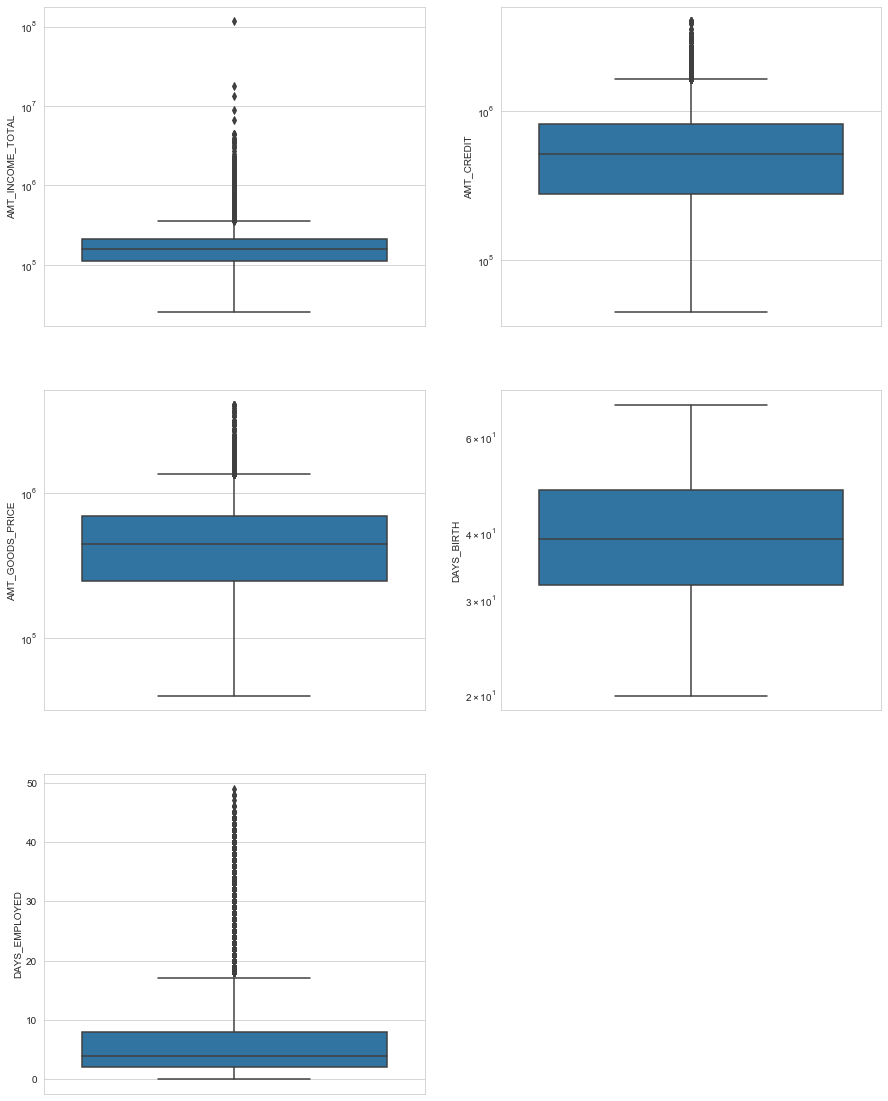

In [35]:
# create box plots for the selected 5 columns and analyse for outliers

# create a list to store the name of the columns
cols_to_analyse = df_numeric.columns[1:6]

# print the columns to analyse
print('Columns to analyse:',cols_to_analyse)

# plot the graphs for all the 5 selected columns
plt.figure(figsize=(15,20))
sns.set_style('whitegrid')
for i in enumerate(cols_to_analyse):
    plt.yscale('log')
    ax = plt.subplot(3,2,i[0]+1)
    sns.boxplot(y=df_numeric[i[1]])

### From the above plots, it is clear that the 4 out of 5 columns have huge number of outliers, since the black dots/values are outside the whiskers

### Also, let's analyse them by using one more method

In [36]:
# decribe the columns with their percentile range (5% t0 99%)
for col in cols_to_analyse:
    print(df_numeric[col].describe(percentiles = [0.05,0.1,0.2,0.25,0.4,0.5,0.75,0.90,0.95,0.99]))
    print('----------------------------------------')

count    2.518810e+05
mean     1.759583e+05
std      2.589665e+05
min      2.565000e+04
5%       7.200000e+04
10%      9.000000e+04
20%      1.125000e+05
25%      1.125000e+05
40%      1.350000e+05
50%      1.575000e+05
75%      2.115000e+05
90%      2.700000e+05
95%      3.555000e+05
99%      5.175000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
----------------------------------------
count    2.518810e+05
mean     6.117325e+05
std      4.065512e+05
min      4.500000e+04
5%       1.439100e+05
10%      1.800000e+05
20%      2.597940e+05
25%      2.779695e+05
40%      4.500000e+05
50%      5.212800e+05
75%      8.302140e+05
90%      1.170000e+06
95%      1.350000e+06
99%      1.886850e+06
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64
----------------------------------------
count    2.518810e+05
mean     5.494057e+05
std      3.732685e+05
min      4.050000e+04
5%       1.350000e+05
10%      1.800000e+05
20%      2.250000e+05
25%      2.475000e+05
40%      4

### From the above output, the values from min to max of each column are NOT gradually increasing, except for the column named 'DAYS_BIRTH'. Glacing on the value range from min to max is one approach to identify outliers.

### Treat outliers - Using the capping/flooring method. 

### If a value is more than equal to 99 percentile then cap the values to the value of 99%
### If a value is less than equal to 1 percentile then floor the values to the value of 1%

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED']


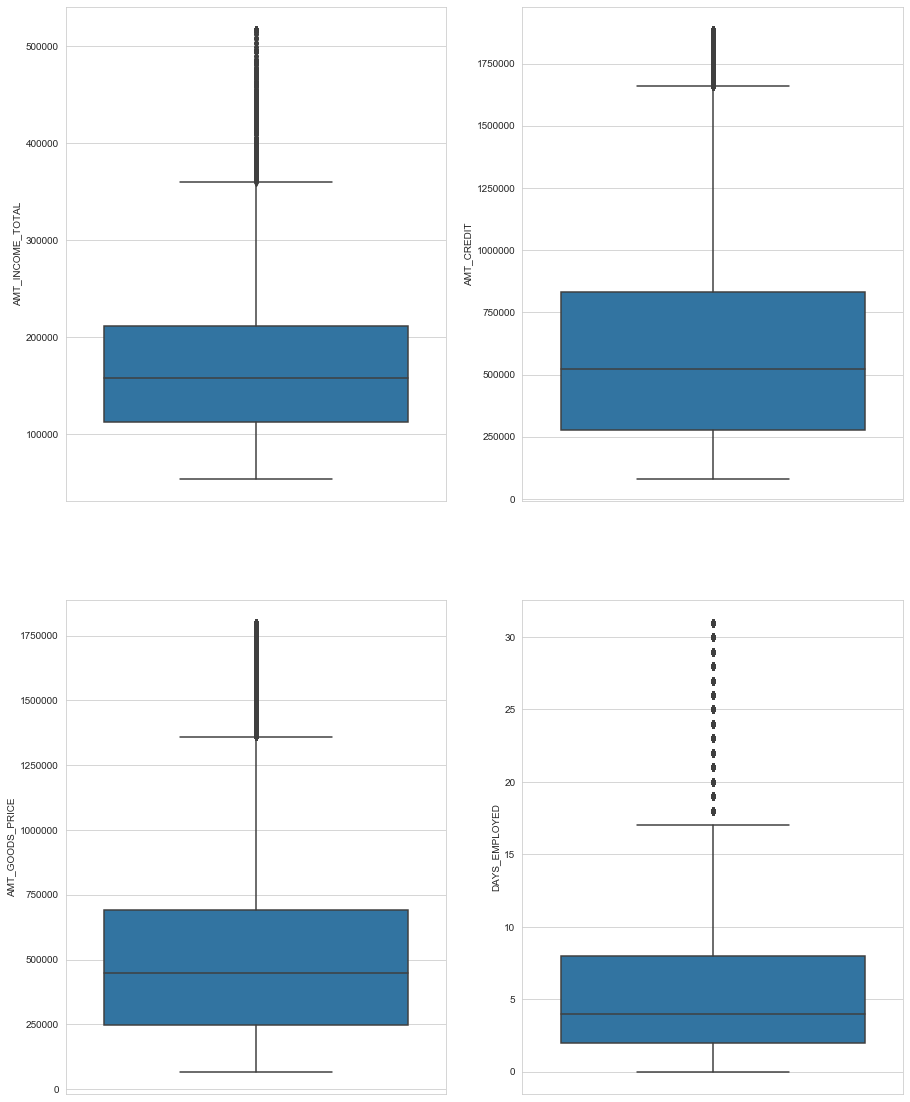

In [37]:
# Perform capping and flooring on them.

# lets treat those 4 columns
cols_to_treat = list(cols_to_analyse)

# remove 'DAYS_BIRTH' from the list
cols_to_treat.pop(cols_to_treat.index('DAYS_BIRTH'))

# print the columns to treats
print(cols_to_treat)

# loop over the so-found outlier columns and perform capping on the original data frame which has 22 columns
for col in cols_to_treat:
    percentiles = df[col].quantile([0.01,0.99]).values
    df[col] = np.clip(df[col], percentiles[0], percentiles[1])
    
# check if the outliers in the original data frame are treated for those 4 columns    
plt.figure(figsize=(15,20))
for i in enumerate(cols_to_treat):
    ax = plt.subplot(2,2,i[0]+1)
    sns.boxplot(y=df[i[1]])

### The outlier that are capped/floored to the 99% and 1% percentiles respectively doesn't really remove the outliers. Let's cap them with 95th percentile and see the results.

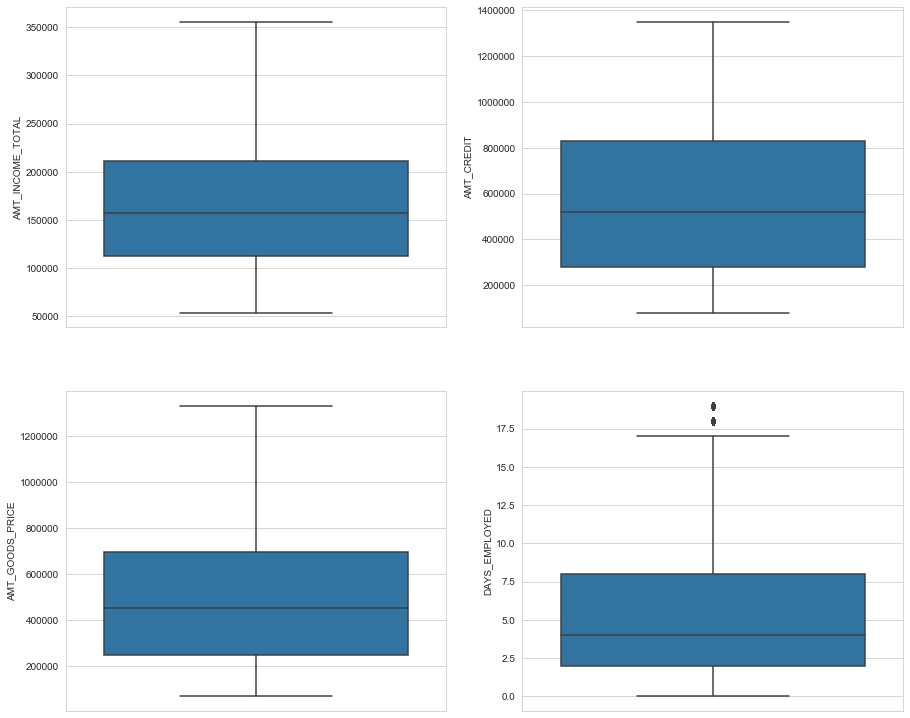

In [38]:
# loop over the so-found outlier columns and perform capping on the original data frame which has 23 columns
for col in cols_to_treat:
    percentiles = df[col].quantile([0.01,0.95]).values
    df[col] = np.clip(df[col], percentiles[0], percentiles[1])
    
# check if the outliers in the original data frame are treated for those 3 columns    
plt.figure(figsize=(15,20))
for i in enumerate(cols_to_treat):
    ax = plt.subplot(3,2,i[0]+1)
    sns.boxplot(y=df[i[1]])

### Now, those 4 columns have no outliers. They have been treated

- ### 4.6. Binning of continuous variables

In [39]:
# get the list of numeric columns found earlier
print(df_numeric.columns)

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START'],
      dtype='object')


In [40]:
# select one column for binning
# HOUR_APPR_PROCESS_START seems workable- 
# the description of it is:  Approximately at what hour did the client apply for the loan

# extract the meaning of the column using describe function
print(df_numeric['HOUR_APPR_PROCESS_START'].describe())

count    251881.000000
mean         12.202905
std           3.299945
min           0.000000
25%          10.000000
50%          12.000000
75%          15.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


### This column represents the hour at which the client applied for the loan, so the range of values can be from 0-23, i.e., in 12 AM to 11:59 PM. Let's bin them in 4 bins, namely:

1. ### Early Morning - 4 AM to 8 AM


2. ### Morning - 8 AM to 12 PM


3. ### Afternoon - 12 PM to 4 PM


4. ### Evening - 4 PM to 8PM


5. ### Night - 8 PM to 12 AM


6. ### Late Night - 12 AM to 4 AM

In [41]:
# create bins and labels
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Afternoon','Evening','Night']

# redefine the column by grouping the values into the defined bins
df['HOUR_APPR_PROCESS_START'] = pd.cut(df['HOUR_APPR_PROCESS_START'], bins=b, labels=l,include_lowest=True)

# check the frequency of the column
print(pd.value_counts(df['HOUR_APPR_PROCESS_START']))

Morning          108352
Afternoon         87605
Early Morning     26174
Evening           26082
Late Night         3122
Night               546
Name: HOUR_APPR_PROCESS_START, dtype: int64


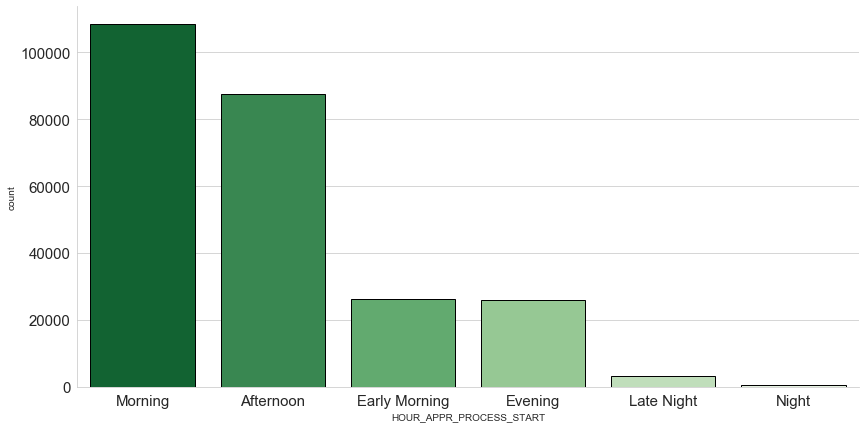

In [42]:
# check the count of the values of the columns against the bins
fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x = 'HOUR_APPR_PROCESS_START', data = df, palette='Greens_r',edgecolor='black', order=df['HOUR_APPR_PROCESS_START'].value_counts().index)
ax.tick_params(labelsize=15)
sns.despine(top=True)

### It can be inferred from the above graph that majority of the applicatants applied for a loan in the morning hours, i.e., between 8AM to 12PM.

## 5. Data Analysis

## Identify if there is data imbalance in the data. Find the ratio of data imbalance

In [43]:
# calculate percentage of distinct values of 'TARGET' column
round(100*(df['TARGET'].value_counts() / df.shape[0]),2)

0    91.34
1     8.66
Name: TARGET, dtype: float64

### There is huge data imbalance w.r.t to the 'TARGET' variable, since the ratio of the values is huge. (when taken with values '0' is to '1', i.e., 91.34% :  8.66%)

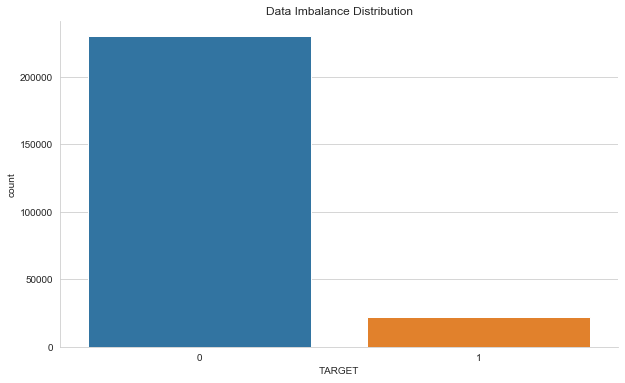

In [44]:
# plot the TARGET column to visualize the imbalance
plt.figure(figsize=(10,6))
plt.title('Data Imbalance Distribution')
sns.countplot(x='TARGET', data=df)
sns.despine(top=True)

['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


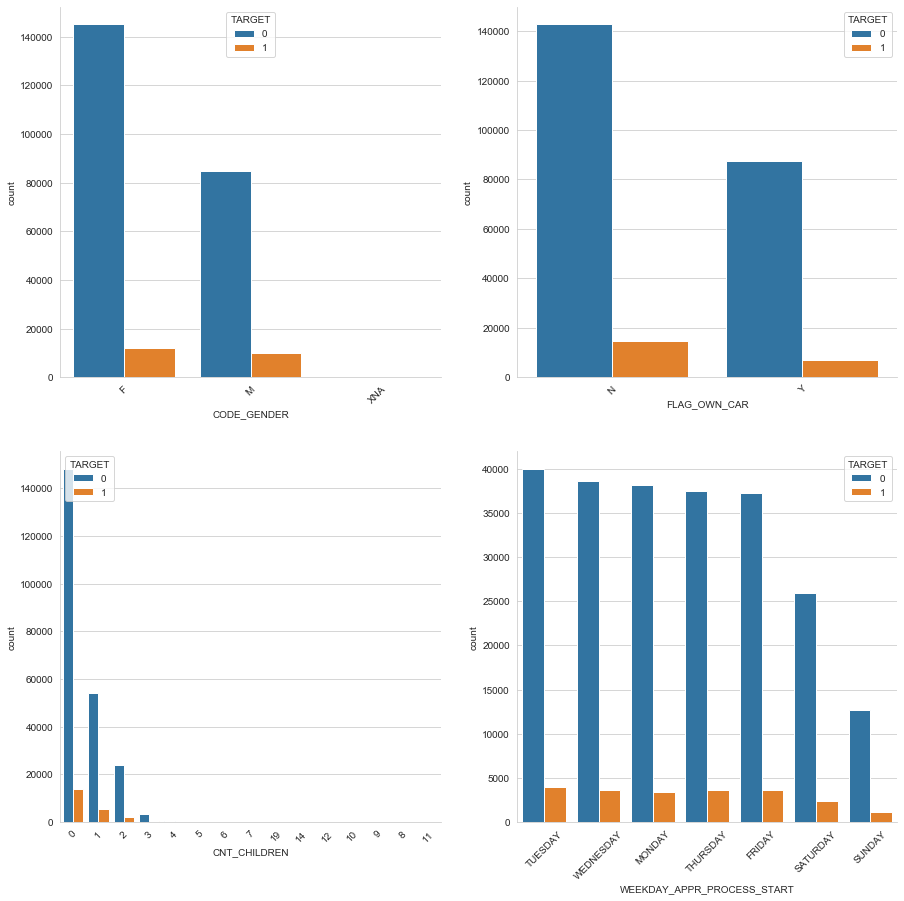

In [45]:
# get categorical columns
obj = ['object']
cat_cols = list(df.select_dtypes(include=obj).columns)

# print cat columns
print(cat_cols)

# pick columns to perform analysis on
cat_cols_analysis = ['CODE_GENDER', 'FLAG_OWN_CAR', 'CNT_CHILDREN', 'WEEKDAY_APPR_PROCESS_START']

# plot the charts 
plt.figure(figsize=(15,15))
for i in enumerate(cat_cols_analysis):
    plt.subplot(2,2, i[0]+1)
    sns.countplot(x=i[1], hue='TARGET', data=df, order=df[i[1]].value_counts().index)
    sns.despine(top=True)
    plt.xticks(rotation=45)

### It can be seen that the 'TARGET' variable is still imbalanced across different categorical values

['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']


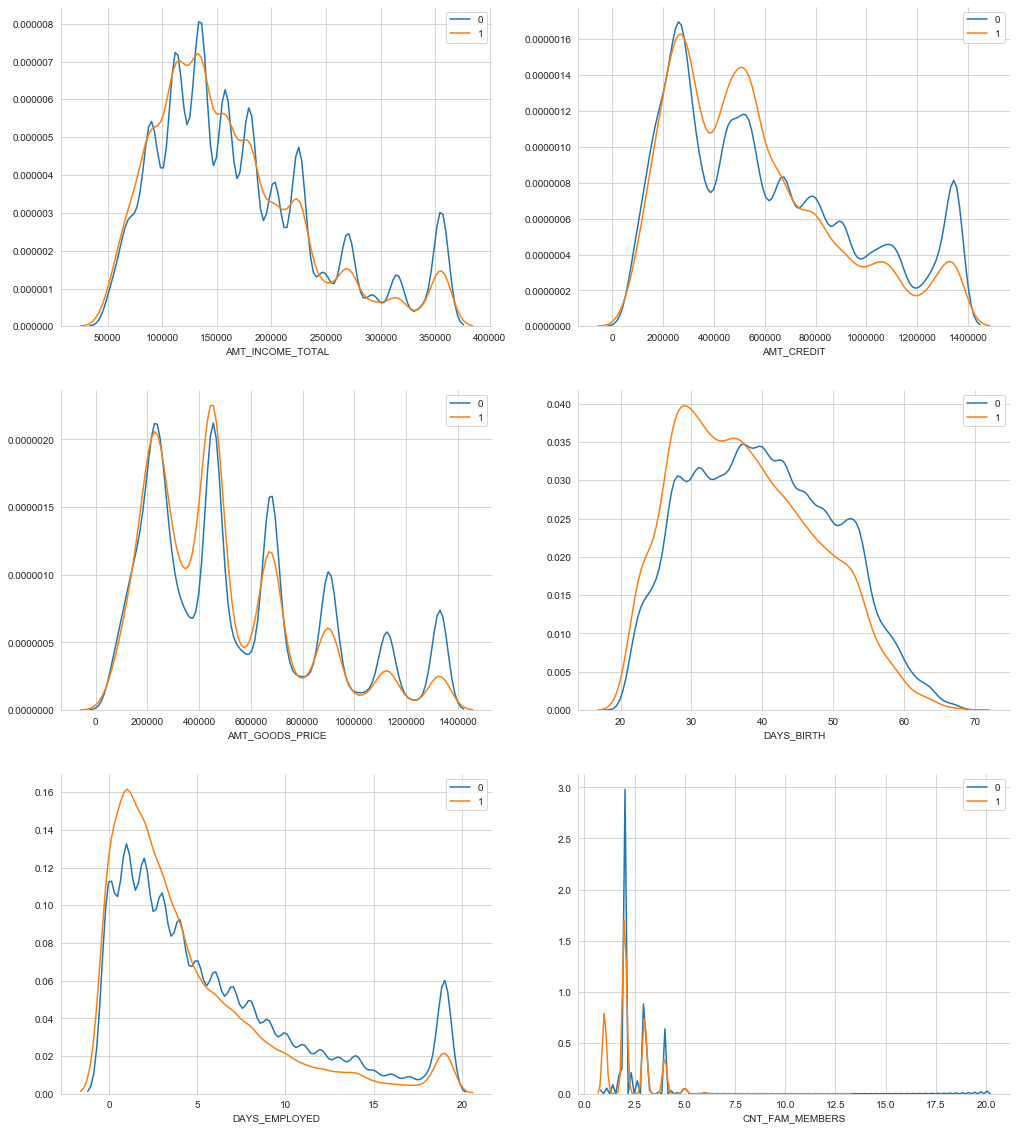

In [46]:
import warnings
warnings.filterwarnings('ignore')
# get continuous columns
num = ['int64','float64']
conti_cols = list(df.select_dtypes(include=num).columns)

# print cat columns
print(conti_cols)

# pick columns to perform analysis on
# remove 'SK_ID_CURR' from the list
conti_cols.pop(conti_cols.index('SK_ID_CURR'))

# plot the graphs
plt.figure(figsize=(17,20))
target = [0, 1]
for index in enumerate(conti_cols):
    plt.subplot(3,2, index[0]+1)
    for i in target:
        subset = df[df['TARGET']==i]
        sns.distplot(subset[index[1]], hist = False, label=i)
        sns.despine(top=True)

### It can be observed that for the CONTINUOUS columns, the distribution of TARGET variable seems to similar. 

## Analyse seperately for Target = 1 and Target = 0

In [47]:
# create a new data frame for TARGET = 1
df_tar_1 = df.loc[df['TARGET'] == 1]

# check value counts of TARGET Variable of new data from to ensure it has only 1 as target value
print(df_tar_1['TARGET'].value_counts())

# create a new data frame for TARGET = 0
df_tar_0 = df.loc[df['TARGET'] == 0]

# check value counts of TARGET Variable of new data from to ensure it has only 0 as target value
print(df_tar_0['TARGET'].value_counts())

1    21816
Name: TARGET, dtype: int64
0    230065
Name: TARGET, dtype: int64


In [48]:
# get categorical columns for target 1 data frame 
obj = ['object']
cat_cols_1 = list(df_tar_1.select_dtypes(include=obj).columns)

# print the categorical columns
print(cat_cols_1)

['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


### TARGET = 1: Analysis

### UNIVARIATE Analysis - Categorical Columns

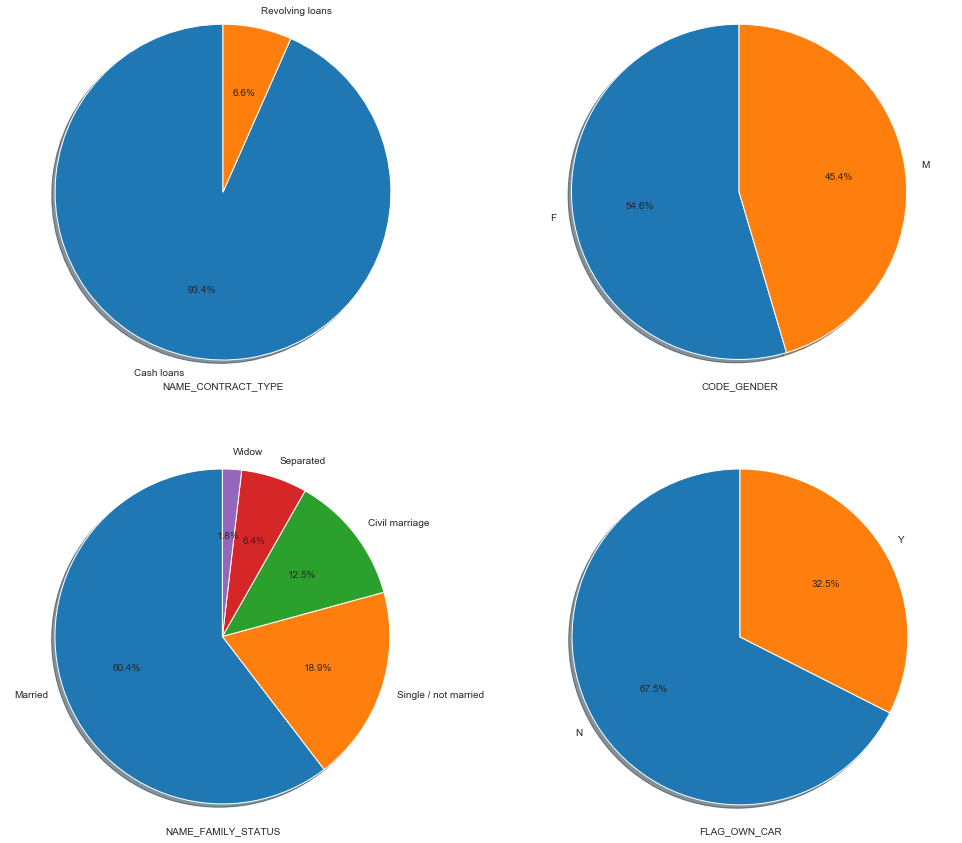

In [49]:
# create list of categorical columns to analyse using pie chart
cat_cols_analy = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_FAMILY_STATUS','FLAG_OWN_CAR']

# plot a pie chart to represent the percentage of applicants who defaulted opted for cash loans or revolving loans   
plt.figure(figsize=(17,15))
for i in enumerate(cat_cols_analy):
    sizes = []
    labels = []
    for index in enumerate(df_tar_1[i[1]].value_counts().index):
        sizes.append(round(100*(df_tar_1[i[1]].value_counts()[index[0]] / df_tar_1.shape[0]),2))
        labels.append(df_tar_1[i[1]].value_counts().index[index[0]])
    plt.subplot(2,2,i[0]+1)
    plt.pie(sizes,  labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle. 
    plt.xlabel(i[1])

### Insights from the above plots for TARGET = 1 (Clients who defaulted)
1. #### High imbalance of data when taken 'NAME_CONTRACT_TYPE' (Type of loans) into account. There are 93.4% of applicants who opted for 'Cash Loans'


2. #### Not much variation when it comes to the Gender of the applicants. Almost equal proportion is noticed.


3. #### 'MARRIED' people have defaulted the most.


4. #### Around 70% of the applicants who don't own a car have defaulted.

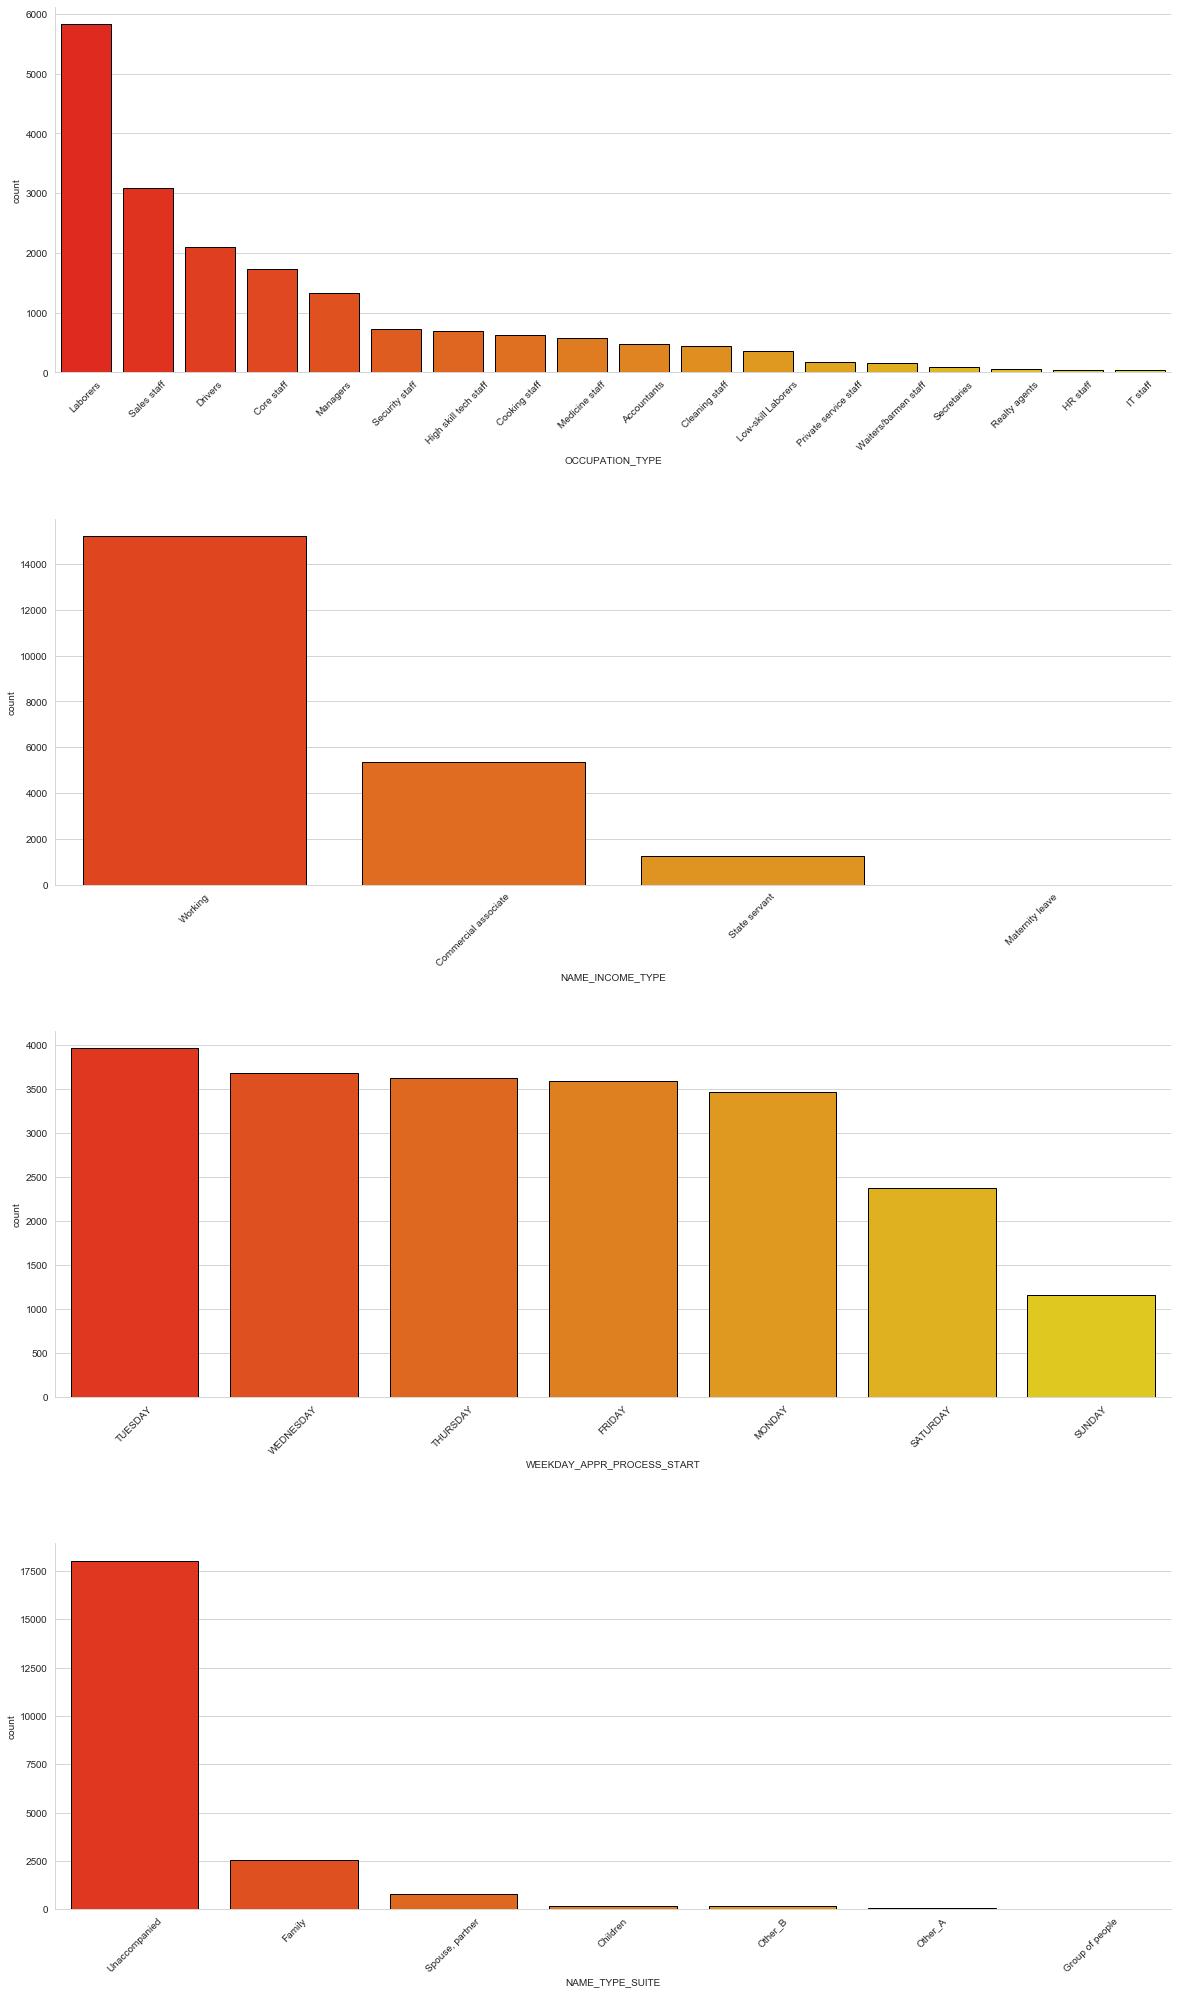

In [50]:
# create list of categorical columns to analyse using bar chart
cat_cols_analy = ['OCCUPATION_TYPE','NAME_INCOME_TYPE','WEEKDAY_APPR_PROCESS_START','NAME_TYPE_SUITE']

# plot the graphs using countplot
fig = plt.figure(figsize=(20,35))
for i in enumerate(cat_cols_analy):
    plt.subplot(4,1,i[0]+1)
    sns.countplot(df_tar_1[i[1]],palette='autumn',edgecolor='black',order=df_tar_1[i[1]].value_counts().index)
    plt.xticks(rotation=45)
    sns.despine(top=True)
    fig.subplots_adjust(hspace=0.4)

1. #### When it comes to the 'OCCUPATION TYPE', Laborers have the higher percentage of default rate. 

2. #### People who come under 'Working' category have defaulted the highest.

3. #### There is no significant difference in the applications that were applied when it comes to the day of the week.

4. #### Clients who were alone or unaccompanied when appliying for the loan contribute to a HUGE percentage of default rate.

### UNIVARIATE Analysis - Continuous Columns

In [51]:
# get continuous/numerical columns for target 1 data frame 
num = ['int64', 'float64']
num_cols_tar_1 = list(df_tar_1.select_dtypes(include=num).columns)

# print the continuous columns
print(num_cols_tar_1)

# create seperate df with only relevant continuous columns to analyse
df_conti_tar_1 = df_tar_1.loc[:,num_cols_tar_1]

# check head
df_conti_tar_1.head()

['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']


,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,100002,202500.0,406597.5,351000.0,25,1,1.0
26,100031,112500.0,979992.0,702000.0,51,7,1.0
40,100047,202500.0,1193580.0,855000.0,47,3,2.0
42,100049,135000.0,288873.0,238500.0,36,9,2.0
94,100112,315000.0,953460.0,900000.0,27,5,1.0


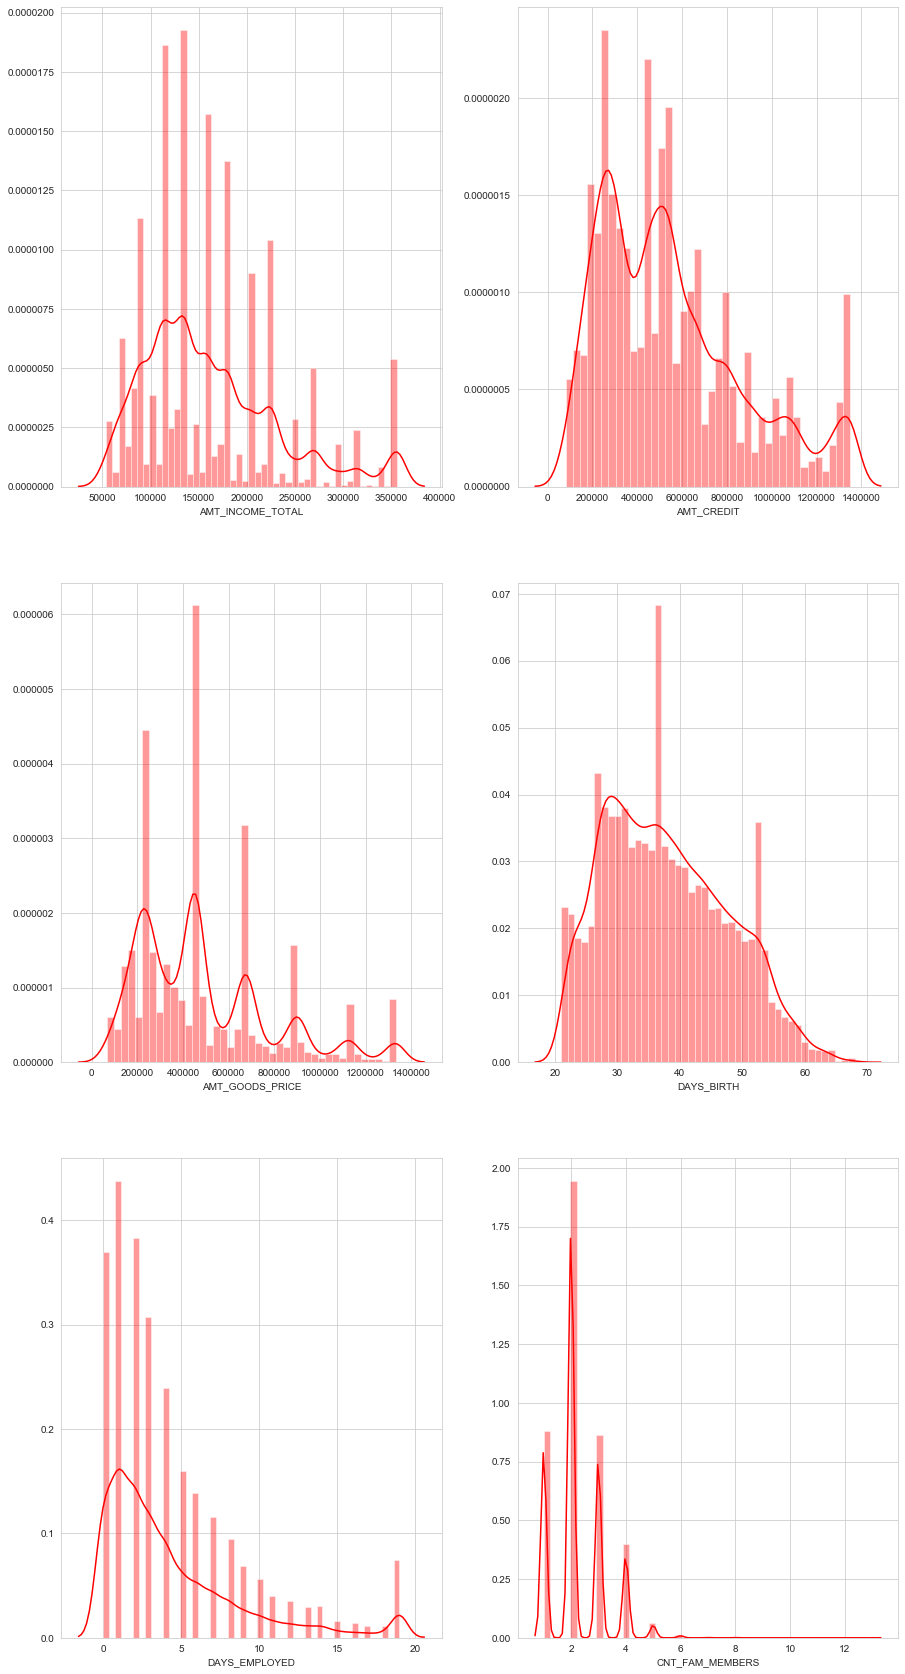

In [52]:
# plot the distribution for continuous variables

# remove the SK_ID_CURR column name from the list
num_cols_tar_1.pop(num_cols_tar_1.index('SK_ID_CURR'))

plt.figure(figsize=(15,30))
for col in enumerate(num_cols_tar_1):
    plt.subplot(3,2, col[0]+1)
    sns.distplot(df_conti_tar_1[col[1]],color='red')

## INSIGHTS from the above CONTINUOUS VARIABLES for TARGET 1

1. ### AMT_INCOME_TOTAL (Income of the client): Majority of the client have their annual income to be between 1.2L-1.4L

2. ### AMT_CREDIT (Credit amount of the loan): Most of the clients receinved loan amount around 3L and around 5.5L

3. ### AMT_GOODS_PRICE (For consumer loans it is the price of the goods for which the loan is given): The price of goods for which clients required the loans lies around 2L and 5L. It also varies a lot, doen't follow a standard distribution.

4. ### DAYS_BIRTH (Client's age in days at the time of application): Majority of the clients age at the time of loan application was in the late 20's and early 30's. It resembles the most to the standard distribution.

5. ### DAYS_EMPLOYED (How many days before the application the person started current employment): Most of the clients started started their jobs 1 year before applying for the loans.

6. ### CNT_FAM_MEMBERS (How many family members does client have): The number of family members were 2 for majority of the clients. And very less number of applicants have children greater than 5.

### BIVARIATE Analysis - Categorical Attributes

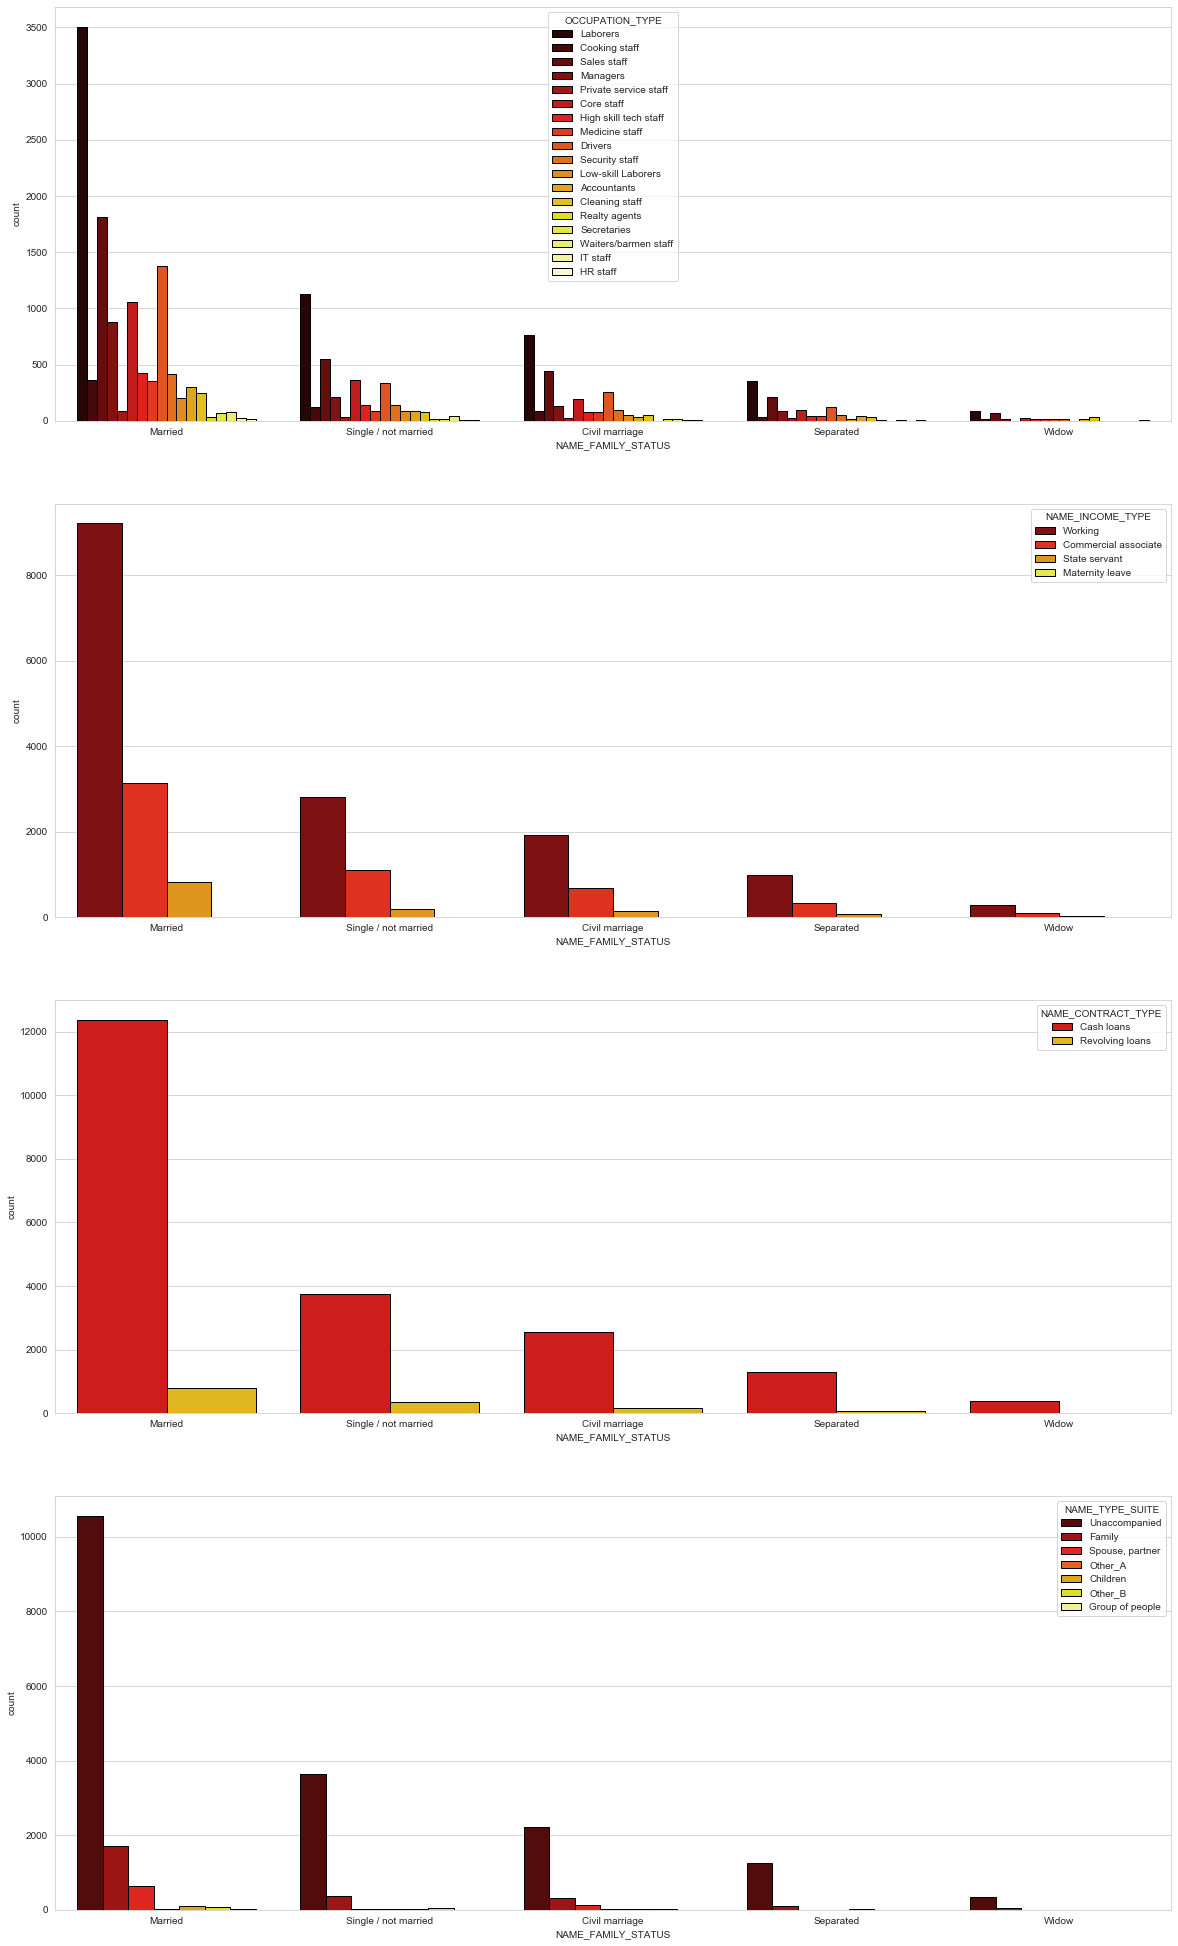

In [53]:
# Analyse on 'NAME_FAMILY_STATUS' with other categorical columns

# Categorical values to be used with 'NAME_FAMILY_STATUS'
cat_to_use = ['OCCUPATION_TYPE','NAME_INCOME_TYPE','NAME_CONTRACT_TYPE','NAME_TYPE_SUITE']

plt.figure(figsize=(20,35))
for i in enumerate(cat_to_use):
    plt.subplot(4,1,i[0]+1)
    sns.countplot(x='NAME_FAMILY_STATUS', hue = i[1], data=df_tar_1 ,palette='hot',edgecolor='black',order=df_tar_1['NAME_FAMILY_STATUS'].value_counts().index)

### Since, we know that 'MARRIED' people have defaulted the most, i.e, >50%, lets analyse more by taking other categorical parameters into account


1. #### 'Laborers' who are married have extremely huge percentage of default rate. Reason could be the income related to the family size

2. #### 'Working' people who are married have defaulted the most.


3. #### People who have taken 'Cash Loans' and are married are on the top list of deaulter.


4. #### Married people who were 'Unaccompanied' have higher default ratio. 

### Let's analyse why laborers defaulted the most.

In [54]:
# considering the below columns to be grouped 
cols = ['NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN']

# get only laborers who defaulted and create a new data frame
df_laborers = df_tar_1.loc[df_tar_1['OCCUPATION_TYPE'] == 'Laborers']

# check info
print(df_laborers[cols].info())

# check if there are any missing values for the above columns
print(df_laborers.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5832 entries, 0 to 307509
Data columns (total 4 columns):
NAME_FAMILY_STATUS    5832 non-null object
OCCUPATION_TYPE       5832 non-null object
AMT_INCOME_TOTAL      5832 non-null float64
CNT_CHILDREN          5832 non-null object
dtypes: float64(1), object(3)
memory usage: 227.8+ KB
None
SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                8
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0


### Drop the missing values

In [55]:
# drop the missing values for column named 'NAME_TYPE_SUITE', It will not create any issues in analysis,
# since we are dealing ONLY with MARRIED LABORERS.
df_laborers.dropna(subset=['NAME_TYPE_SUITE'], inplace=True)

# check if the missing values have been removed for that column
print(df_laborers.isnull().sum())

# Slice to get only "Married" laborers into a different data frame
df_laborers_married = df_laborers.loc[df_laborers['NAME_FAMILY_STATUS'] == 'Married']

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
ORGANIZATION_TYPE              0
dtype: int64


In [56]:
# create bins and labels
minimum = df_laborers_married['AMT_INCOME_TOTAL'].min()
low = df_laborers_married['AMT_INCOME_TOTAL'].quantile(0.25)
medium = df_laborers_married['AMT_INCOME_TOTAL'].quantile(0.75)
maximum = df_laborers_married['AMT_INCOME_TOTAL'].max()

b = [minimum, low, medium, maximum]
l = ['Low', 'Medium', 'High']

# redefine the column by grouping the values into the defined bins
df_laborers_married['AMT_INCOME_TOTAL'] = pd.cut(df_laborers_married['AMT_INCOME_TOTAL'], bins=b, labels=l,include_lowest=True)

# check the frequency of the column
print(pd.value_counts(df_laborers_married['AMT_INCOME_TOTAL']))

# change the data type of the column from numeric to object
df_laborers_married['AMT_INCOME_TOTAL'] = df_laborers_married['AMT_INCOME_TOTAL'].astype('object')

Medium    1780
Low       1055
High       664
Name: AMT_INCOME_TOTAL, dtype: int64


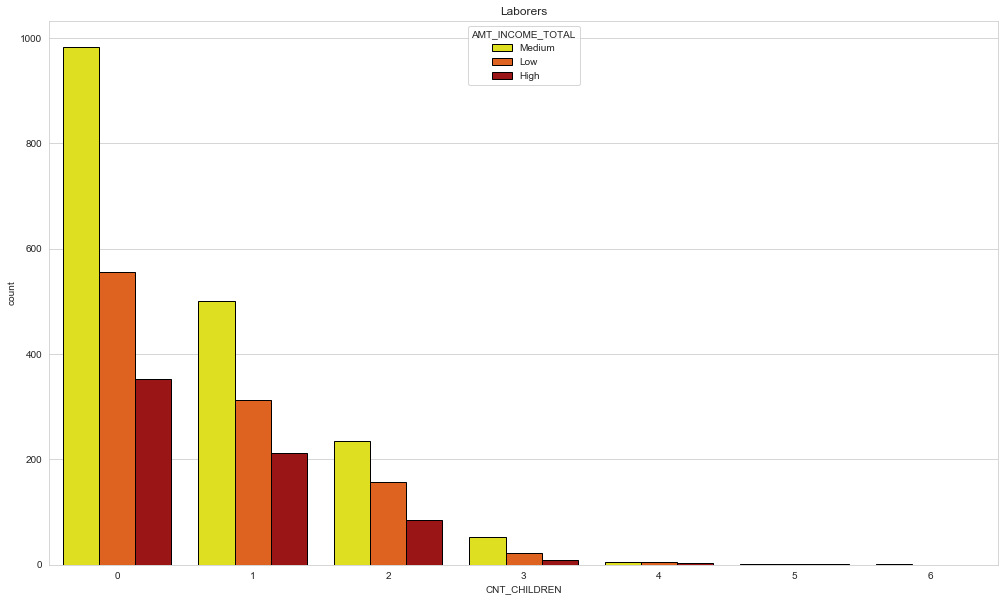

In [57]:
plt.figure(figsize=(17,10))
plt.title('Laborers')
sns.countplot(x='CNT_CHILDREN', hue='AMT_INCOME_TOTAL', data=df_laborers_married ,palette='hot_r',edgecolor='black')
plt.show()

#### It can be observed that Married laborers with Medium Income  and 0 children have defaulted the most. Based on this, it can be inferrered that the labourers with medium salary are trying to venture into new businesses and since they don't have any children, risk affordability is high. And due to this, the tendancy to default might increase.

### BIVARIATE Analysis - Continuous Columns

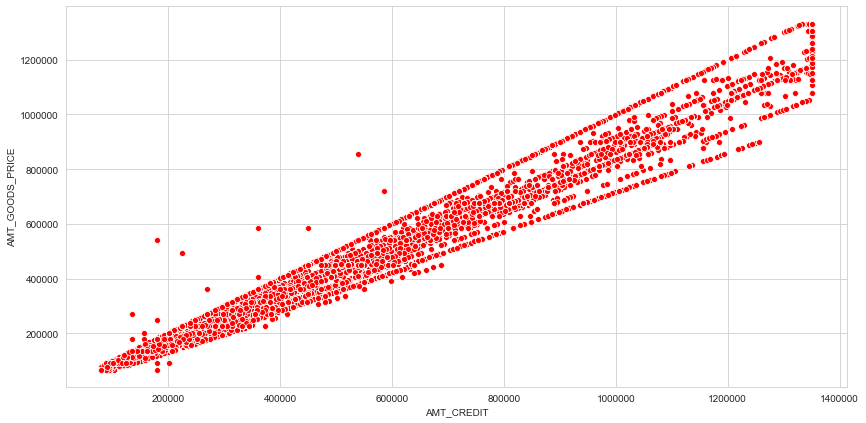

In [58]:
# plot for AMT_INCOME_TOTAL and AMT_GOODS_PRICE
plt.figure(figsize=(14,7))
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE', data=df_conti_tar_1,color='red')
plt.show()

### This is the positive correlation between the amount requested by the client for goods and the amount credited by the bank

<Figure size 1440x720 with 0 Axes>

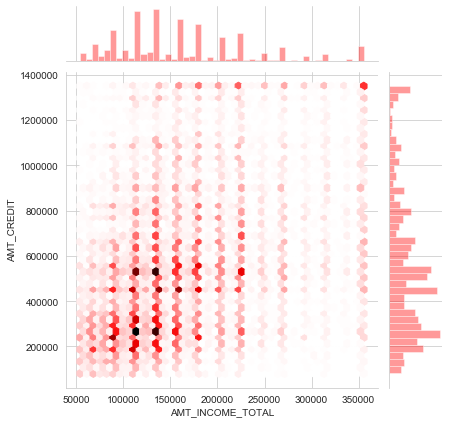

In [59]:
plt.figure(figsize=(20,10))
sns.jointplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT', data=df_conti_tar_1,kind='hex',color='red')
plt.show()

### The Annual income of the client and the amount credited by the bank is heavily clustured at 1.2L and 1.4L as income. For both the incomes, the credit value remains same at a highly dense area of 5.5L

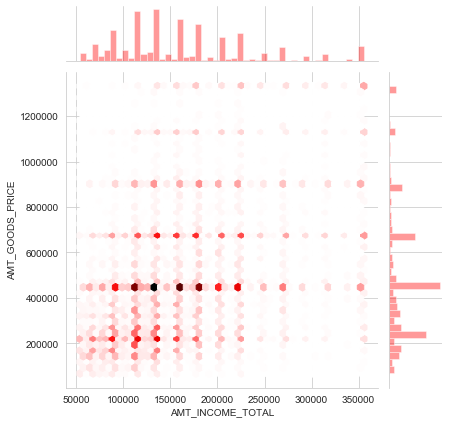

In [60]:
sns.jointplot(x='AMT_INCOME_TOTAL',y='AMT_GOODS_PRICE', data=df_conti_tar_1,kind='hex',color='red')
plt.show()

### The Annual income of the client and the amount requested by the client for goods is heavily clustured at 1.3L and 1.6L as incomes and 4.25L as price of goods for both the income ranges.

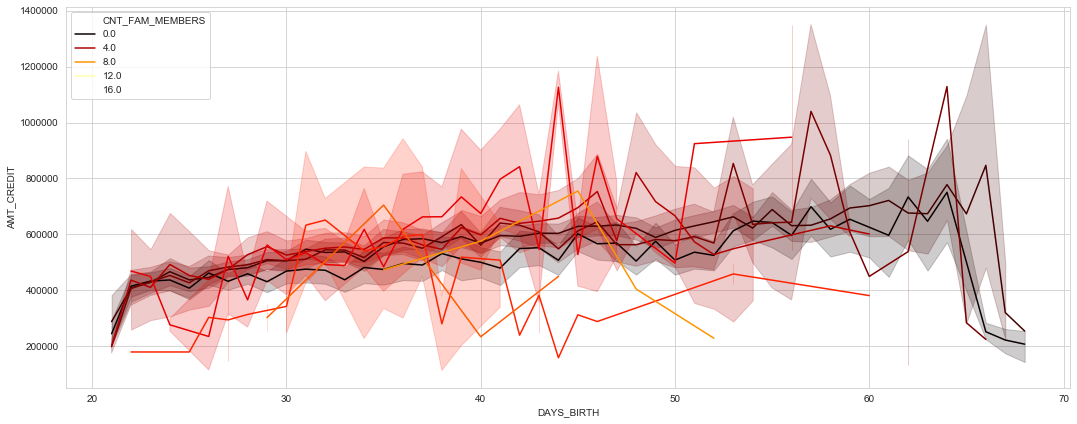

In [61]:
plt.figure(figsize=(18,7))
sns.lineplot(x='DAYS_BIRTH',y='AMT_CREDIT', hue='CNT_FAM_MEMBERS',data=df_conti_tar_1,palette='hot')
plt.show()

### Clients in the mid 40's with 4 family members took the hightest loan amount of around 11L. This can be because of the clients are married with 2 children and looking for a car.

### Also, for the clients in thier mid 60's with 0 family members took the similar amount of loan of rs 11L. This could be to buy property or for business

In [62]:
df_conti_tar_1['CNT_FAM_MEMBERS'].value_counts()

2.0     10183
1.0      4617
3.0      4522
4.0      2102
5.0       324
6.0        53
7.0         6
8.0         6
11.0        1
10.0        1
13.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

## Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable 1).

In [63]:
# get continuous/numerical columns for target 1 data frame 
num = ['int64', 'float64']
num_cols_1 = list(df_tar_1.select_dtypes(include=num).columns)

# print the continuous columns
print(num_cols_1)

# create new data frame with only continnuous variables to analyse for TARGET 1
new_df_tar_1 = df_tar_1.select_dtypes(include=num)

# drop irrelavant column, i.e., the loan id
new_df_tar_1.drop('SK_ID_CURR', axis=1, inplace=True)

# check head
new_df_tar_1.head()

['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,202500.0,406597.5,351000.0,25,1,1.0
26,112500.0,979992.0,702000.0,51,7,1.0
40,202500.0,1193580.0,855000.0,47,3,2.0
42,135000.0,288873.0,238500.0,36,9,2.0
94,315000.0,953460.0,900000.0,27,5,1.0


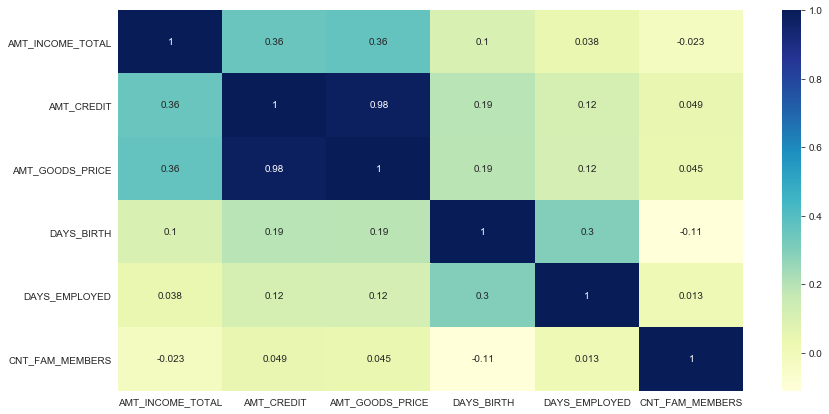

In [64]:
# find correlation
corr_mat = new_df_tar_1.corr()

# plot a heat map to visualize it
plt.figure(figsize=(14,7))
sns.heatmap(corr_mat, annot=True, cmap='YlGnBu')
plt.show()

In [65]:
# find top 10 correrated continuous variables for TARGET 1
corr = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))
corr = corr.abs().unstack().reset_index()
corr.columns= ['VAR1','VAR2', 'CORR']
corr.dropna(subset=['CORR'], inplace=True)
corr = corr.sort_values(by='CORR', ascending=False)
df_top_10_corr_tar_1 = corr[:10]

# create new column 'CORR_VARS' by joining both the columns of continuous variables
df_top_10_corr_tar_1['CORR_VARS'] = df_top_10_corr_tar_1['VAR1'].str.cat(df_top_10_corr_tar_1['VAR2'],sep=' - ')
df_top_10_corr_tar_1

,VAR1,VAR2,CORR,CORR_VARS
13,AMT_GOODS_PRICE,AMT_CREDIT,0.979688,AMT_GOODS_PRICE - AMT_CREDIT
12,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.362534,AMT_GOODS_PRICE - AMT_INCOME_TOTAL
6,AMT_CREDIT,AMT_INCOME_TOTAL,0.356271,AMT_CREDIT - AMT_INCOME_TOTAL
27,DAYS_EMPLOYED,DAYS_BIRTH,0.300825,DAYS_EMPLOYED - DAYS_BIRTH
19,DAYS_BIRTH,AMT_CREDIT,0.194891,DAYS_BIRTH - AMT_CREDIT
20,DAYS_BIRTH,AMT_GOODS_PRICE,0.189796,DAYS_BIRTH - AMT_GOODS_PRICE
26,DAYS_EMPLOYED,AMT_GOODS_PRICE,0.122714,DAYS_EMPLOYED - AMT_GOODS_PRICE
25,DAYS_EMPLOYED,AMT_CREDIT,0.117742,DAYS_EMPLOYED - AMT_CREDIT
33,CNT_FAM_MEMBERS,DAYS_BIRTH,0.110617,CNT_FAM_MEMBERS - DAYS_BIRTH
18,DAYS_BIRTH,AMT_INCOME_TOTAL,0.102781,DAYS_BIRTH - AMT_INCOME_TOTAL


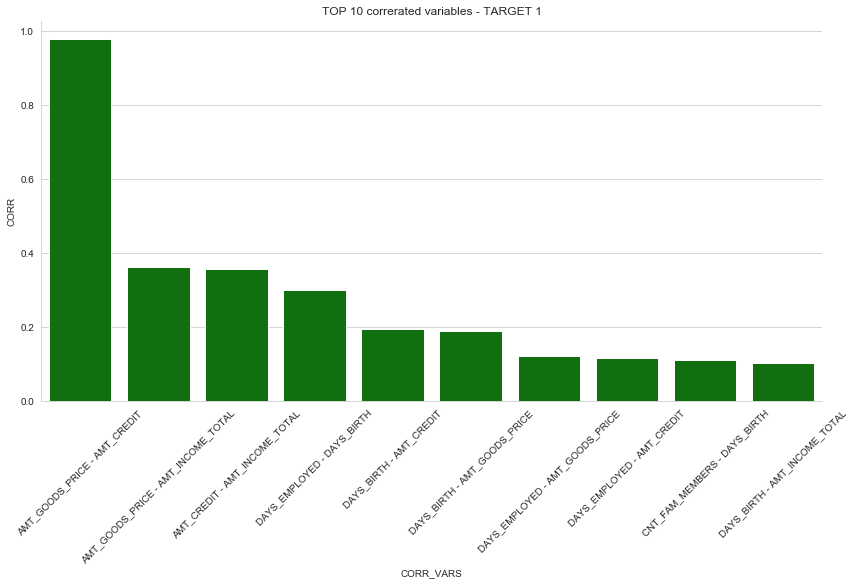

In [66]:
# plot the correlation value with corr variables in descending order
plt.figure(figsize=(14,7))
sns.barplot(x='CORR_VARS', y='CORR', data=df_top_10_corr_tar_1, color='green')
plt.xticks(rotation=45)
plt.title('TOP 10 correrated variables - TARGET 1')
sns.despine(top=True)
plt.show()

### AMT_CREDIT and AMT_GOODS_PRICE have the highest correlation of 0.98 or 98% for TARGET 1

### TARGET = 0: Analysis

### UNIVARIATE Analysis

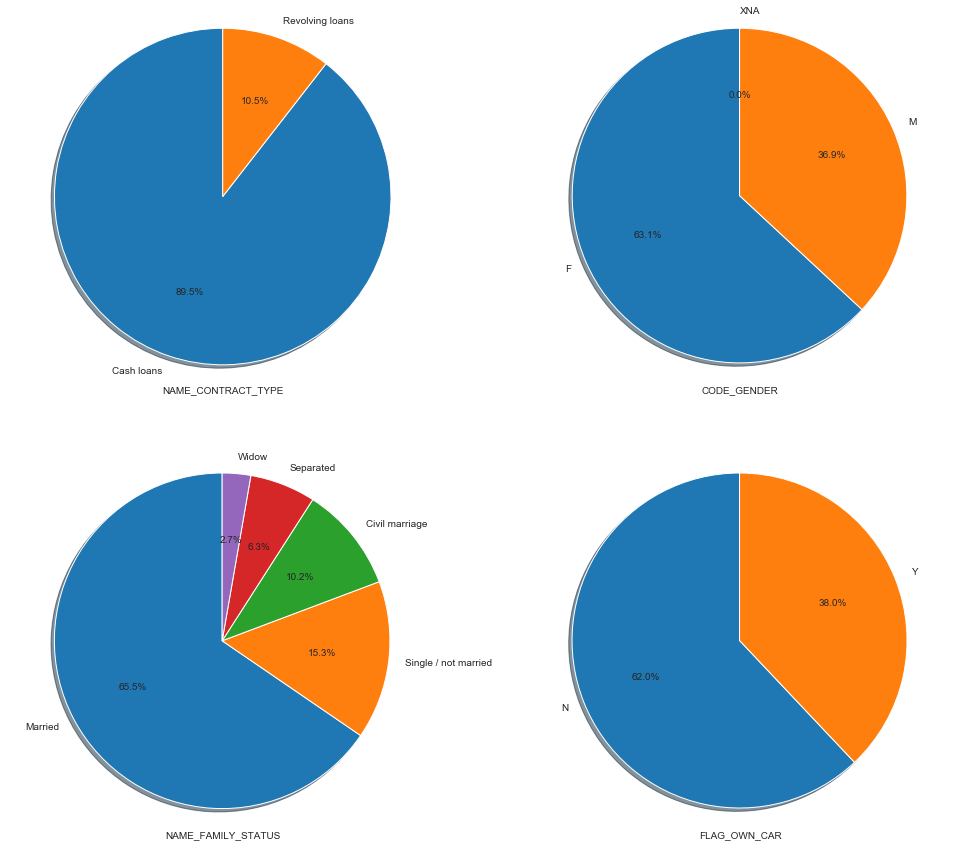

In [67]:
# create list of categorical columns to analyse using pie chart
cat_cols_analy = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_FAMILY_STATUS','FLAG_OWN_CAR']

# plot a pie chart to represent the percentage of applicants who defaulted opted for cash loans or revolving loans   
plt.figure(figsize=(17,15))
for i in enumerate(cat_cols_analy):
    sizes = []
    labels = []
    for index in enumerate(df_tar_0[i[1]].value_counts().index):
        sizes.append(round(100*(df_tar_0[i[1]].value_counts()[index[0]] / df_tar_0.shape[0]),2))
        labels.append(df_tar_0[i[1]].value_counts().index[index[0]])
    plt.subplot(2,2,i[0]+1)
    plt.pie(sizes,  labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle. 
    plt.xlabel(i[1])

### Insights from the above plots for TARGET = 0 (Clients who did not default)
1. #### High imbalance of data when taken 'NAME_CONTRACT_TYPE' (Type of loans) into account. There are 89.5% of applicants who opted for 'Cash Loans'. The behaviour is similar to TARGET 1 data


2. #### More percentage of Female are noticed for people who did not default


3. #### 'MARRIED' people are the ones with high percentage of non-defaulters. Similar behaviour to TARGET 1 data.


4. #### Around 65% of the applicants who don't own a car have not defaulted.

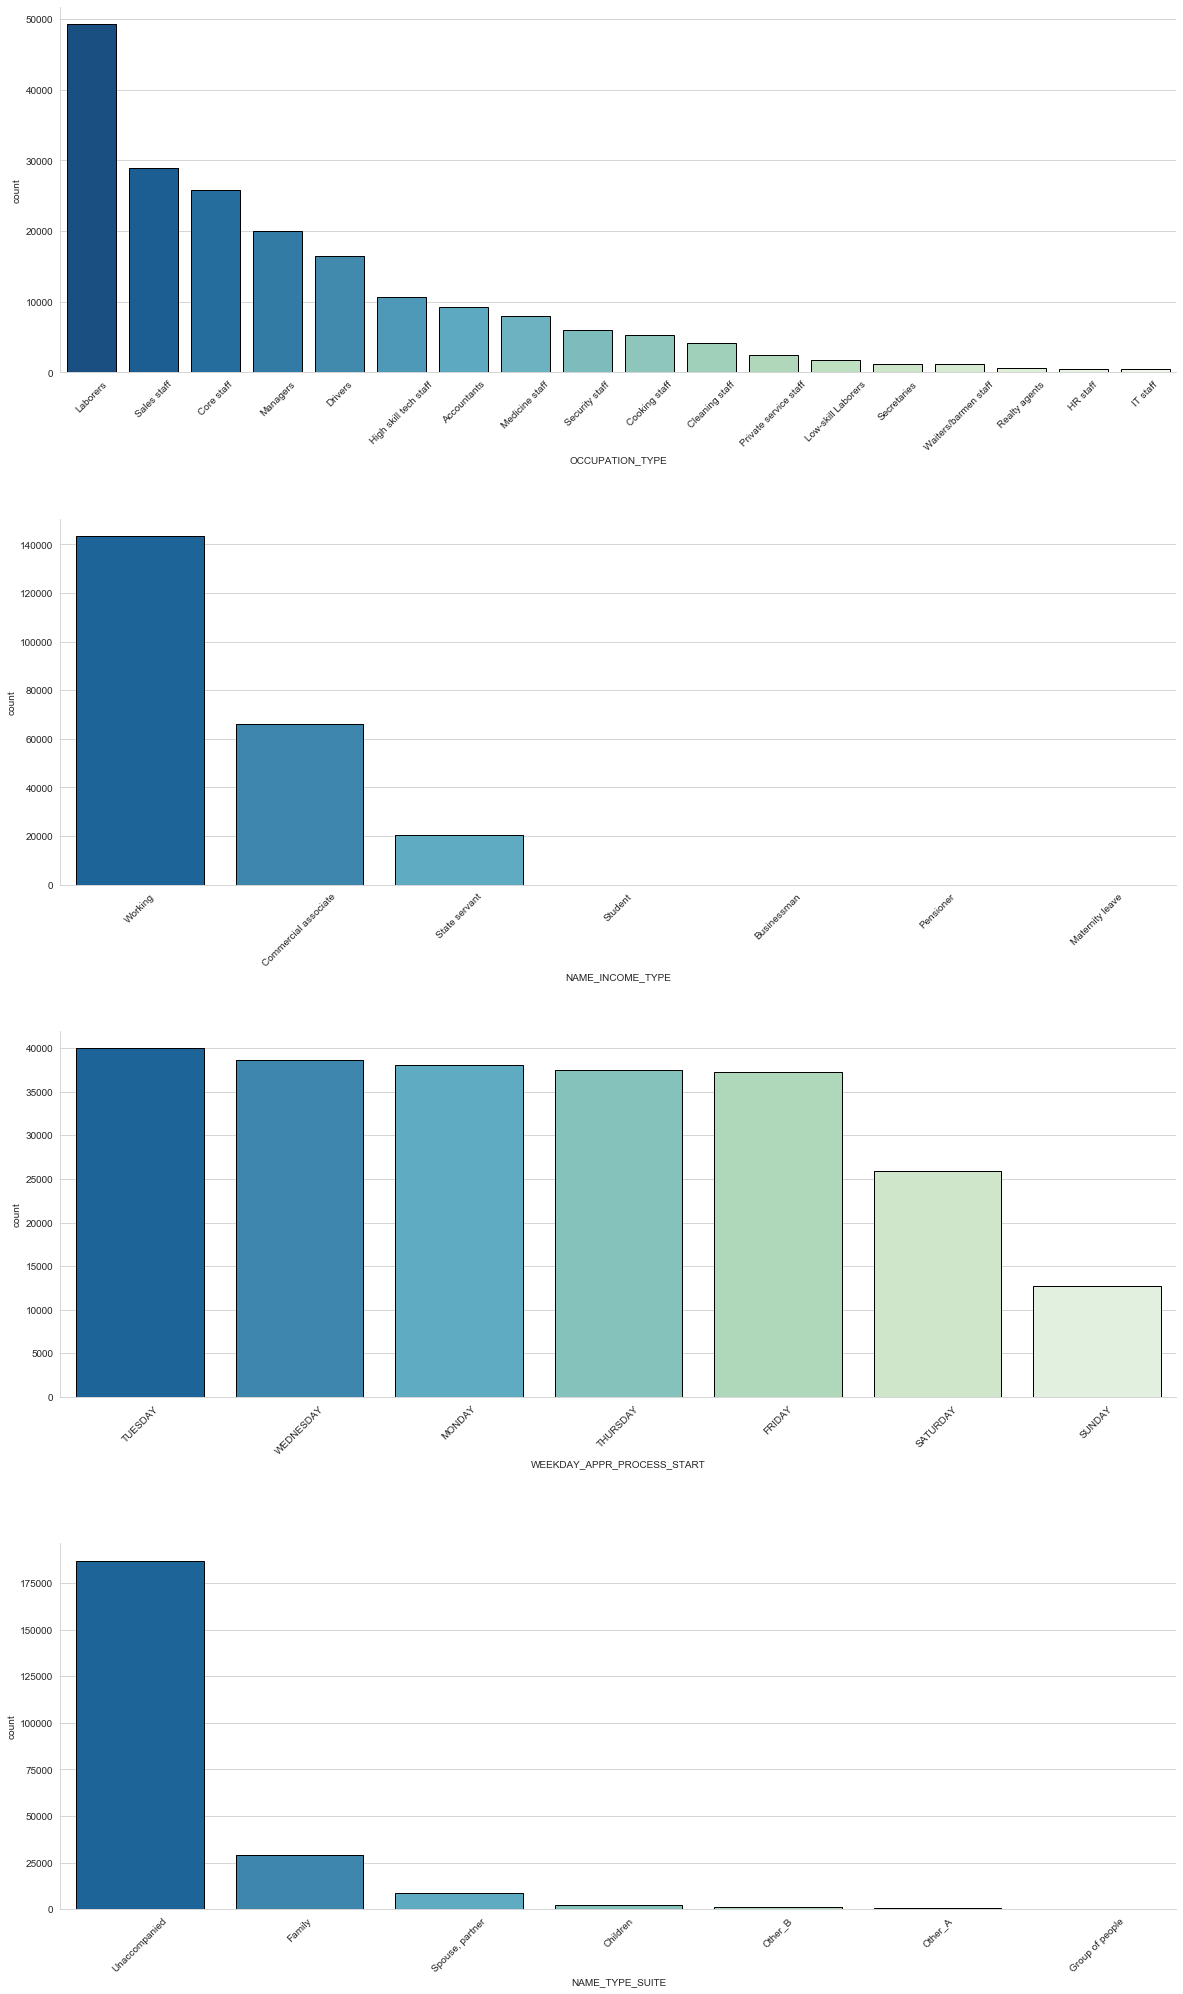

In [68]:
# create list of categorical columns to analyse using bar chart
cat_cols_analy = ['OCCUPATION_TYPE','NAME_INCOME_TYPE','WEEKDAY_APPR_PROCESS_START','NAME_TYPE_SUITE']

# plot the graphs using countplot
fig = plt.figure(figsize=(20,35))
for i in enumerate(cat_cols_analy):
    plt.subplot(4,1,i[0]+1)
    sns.countplot(df_tar_0[i[1]],palette='GnBu_r',edgecolor='black',order=df_tar_0[i[1]].value_counts().index)
    plt.xticks(rotation=45)
    sns.despine(top=True)
    fig.subplots_adjust(hspace=0.4)

### Interestingly, similar pattern is observed for all the above categories as seen for the same categories under TARGET 1 data.

### UNIVARIATE Analysis - Continuous Columns

In [69]:
# get continuous/numerical columns for target 1 data frame 
num = ['int64', 'float64']
num_cols_tar_0 = list(df_tar_0.select_dtypes(include=num).columns)

# print the continuous columns
print(num_cols_tar_0)

# create seperate df with only relevant continuous columns to analyse
df_conti_tar_0 = df_tar_0.loc[:,num_cols_tar_0]

# check head
df_conti_tar_0.head()

['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']


,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
1,100003,270000.0,1293502.5,1129500.0,45,3,2.0
2,100004,67500.0,135000.0,135000.0,52,0,1.0
3,100006,135000.0,312682.5,297000.0,52,8,2.0
4,100007,121500.0,513000.0,513000.0,54,8,1.0
5,100008,99000.0,490495.5,454500.0,46,4,2.0


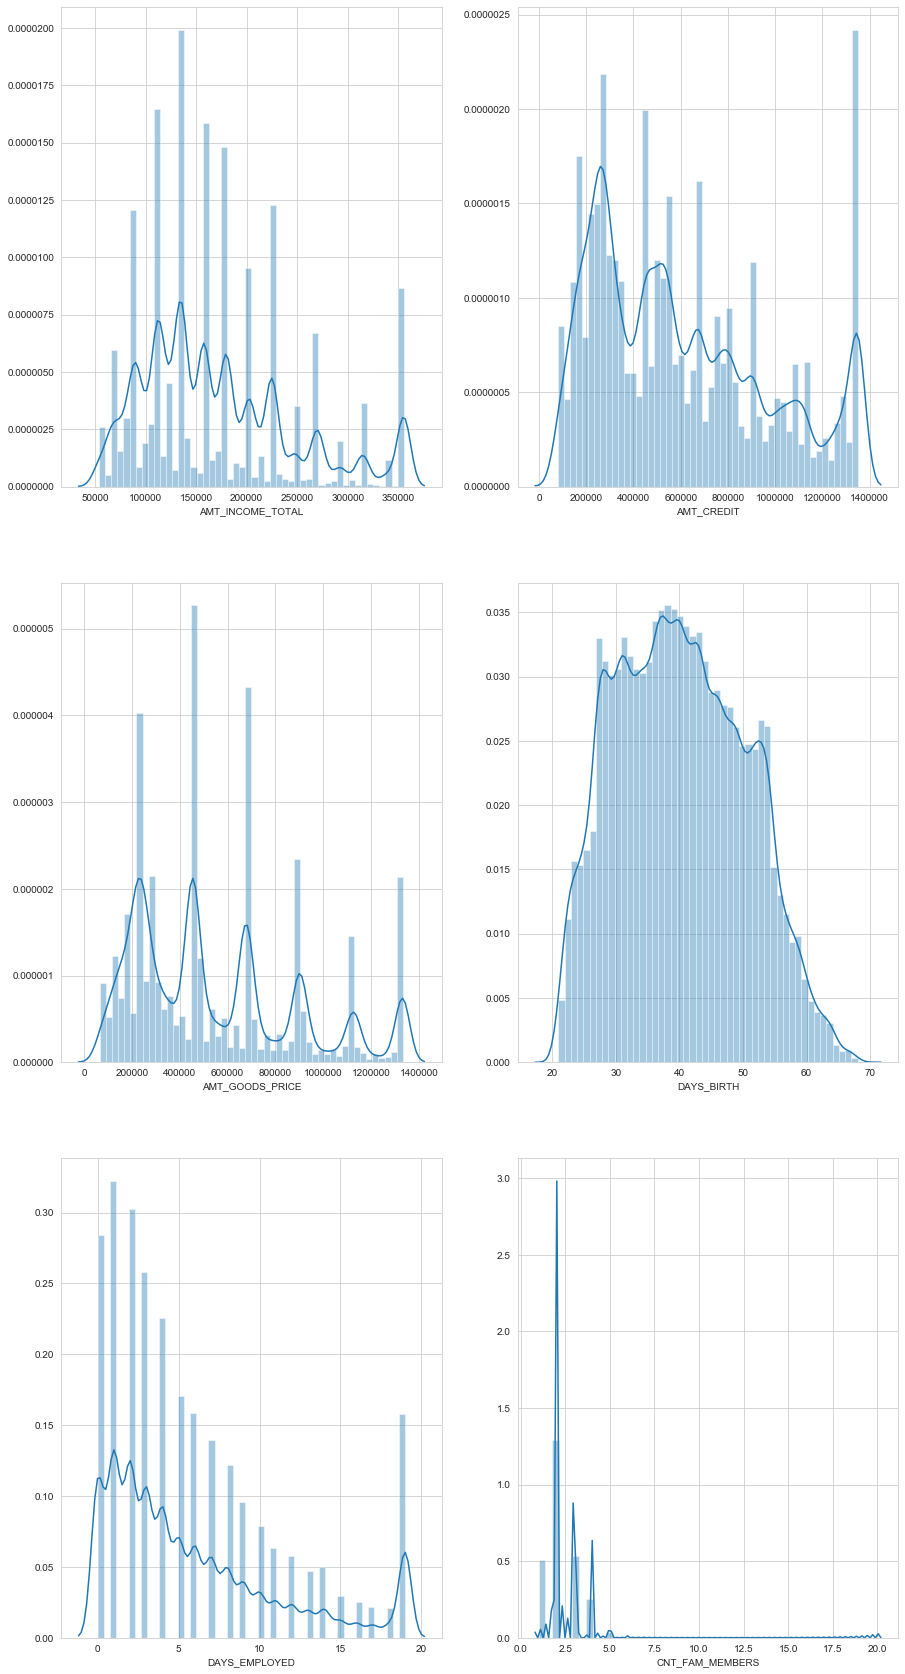

In [70]:
# plot the distribution for continuous variables

# remove the SK_ID_CURR column name from the list
num_cols_tar_0.pop(num_cols_tar_0.index('SK_ID_CURR'))

plt.figure(figsize=(15,30))
for col in enumerate(num_cols_tar_0):
    plt.subplot(3,2, col[0]+1)
    sns.distplot(df_conti_tar_0[col[1]])

## INSIGHTS from the above CONTINUOUS VARIABLES for TARGET 0

1. ### AMT_INCOME_TOTAL (Income of the client): Majority of the client have their annual income to be between 1.2L-1.4L

2. ### AMT_CREDIT (Credit amount of the loan): Most of the clients receinved loan amount around 3L and around 5.5L

3. ### AMT_GOODS_PRICE (For consumer loans it is the price of the goods for which the loan is given): The price of goods for which clients required the loans lies around 2L and 5L. It also varies a lot, doen't follow a standard distribution.

4. ### DAYS_BIRTH (Client's age in days at the time of application): Majority of the clients age at the time of loan application was in the late 30's and early 40's. It resembles the most to the standard distribution.

5. ### DAYS_EMPLOYED (How many days before the application the person started current employment): Most of the clients started started their jobs between 1-2 years before applying for the loans.

6. ### CNT_FAM_MEMBERS (How many family members does client have): The number of family members were 2 for majority of the clients. And very less number of applicants have children greater than 5.

## BIVARIATE Analysis

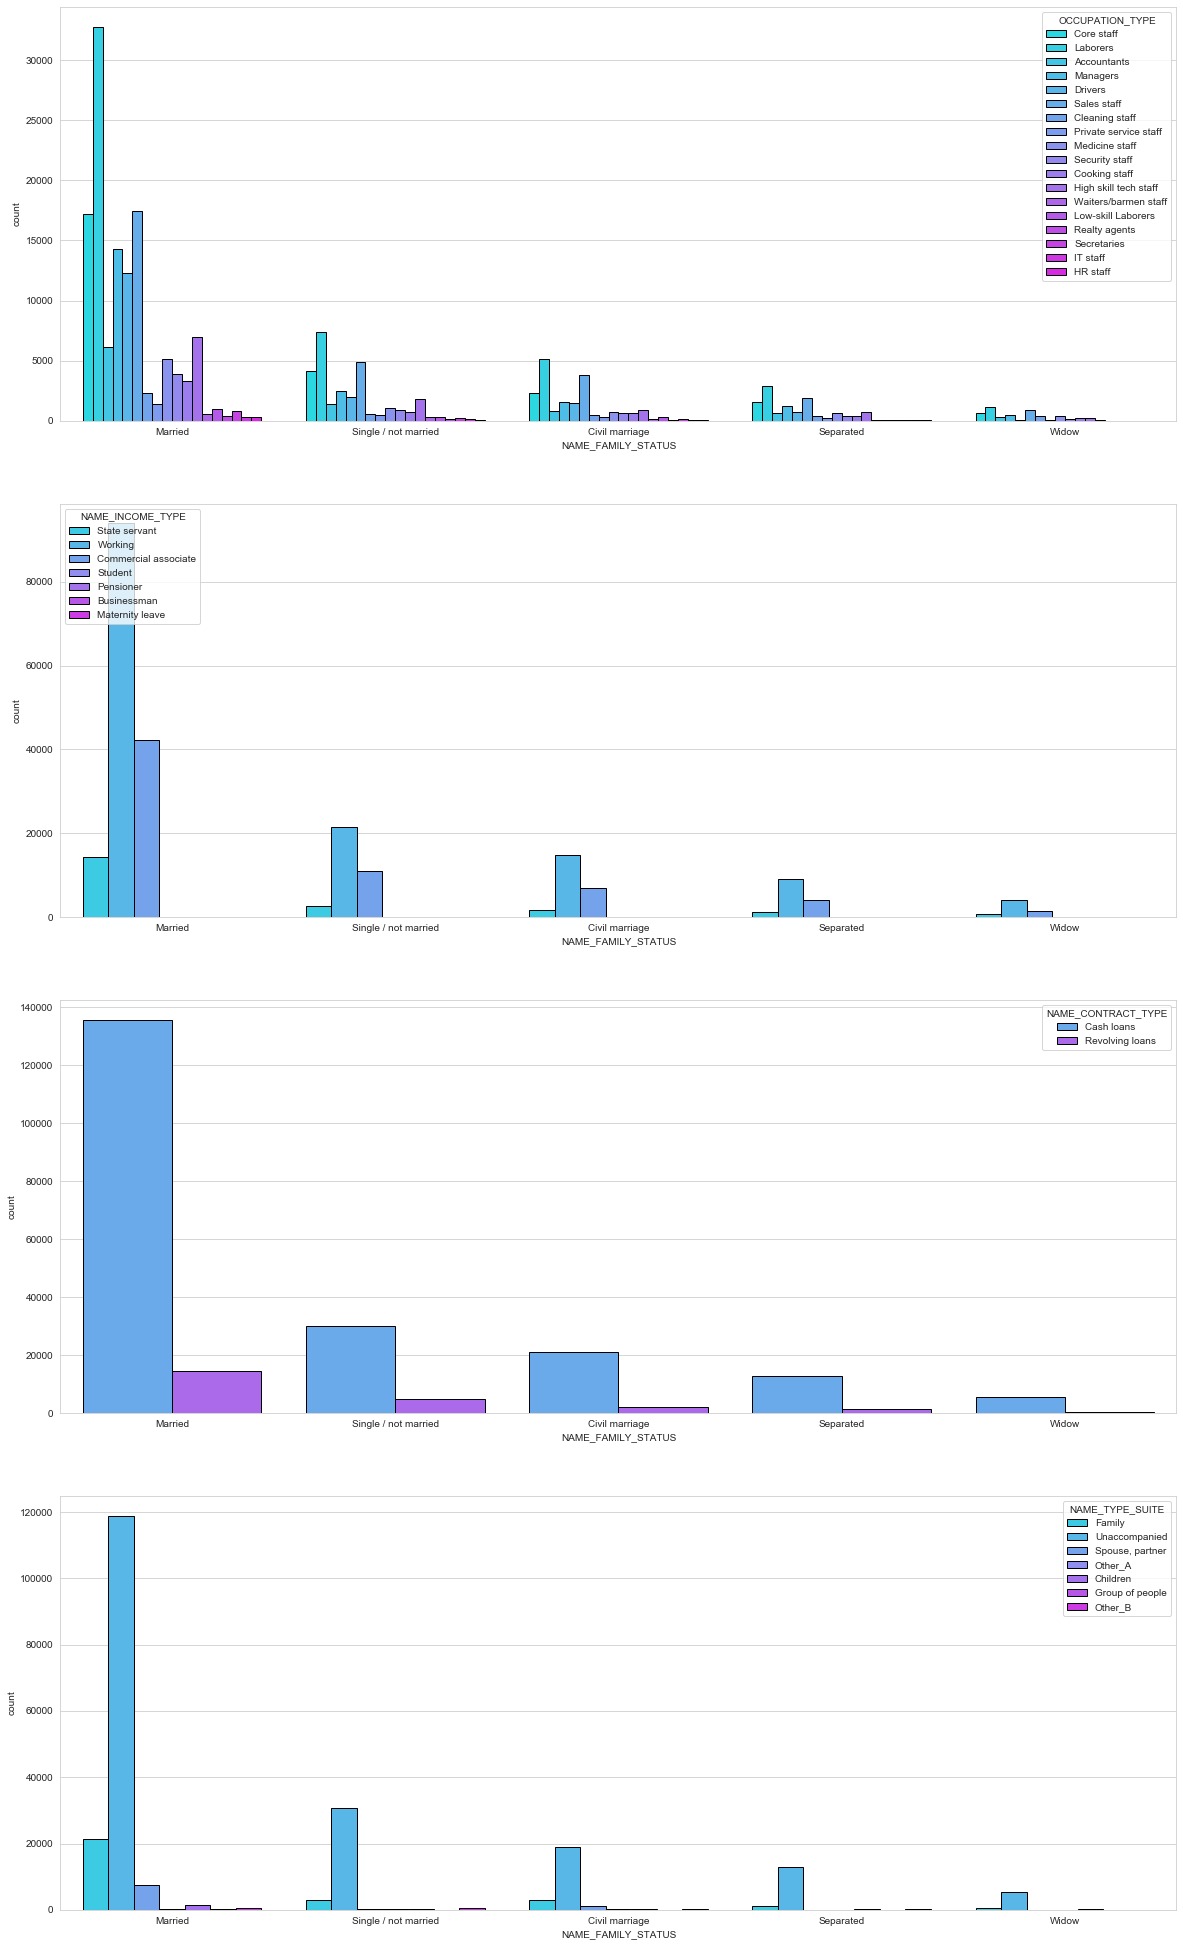

In [71]:
# Analyse on 'NAME_FAMILY_STATUS' with other categorical columns

# Categorical values to be used with 'NAME_FAMILY_STATUS'
cat_to_use = ['OCCUPATION_TYPE','NAME_INCOME_TYPE','NAME_CONTRACT_TYPE','NAME_TYPE_SUITE']

plt.figure(figsize=(20,35))
for i in enumerate(cat_to_use):
    plt.subplot(4,1,i[0]+1)
    sns.countplot(x='NAME_FAMILY_STATUS', hue = i[1], data=df_tar_0 ,palette='cool',edgecolor='black',order=df_tar_0['NAME_FAMILY_STATUS'].value_counts().index)

### Here also, as seen for TARGET 1,  for TARGET 0, married people are ones who have paid their loan on time.

### All the above paramters are similar to the parameters of TARGET 1.

### This could lead to the assumption that applicants who are 'MARRIED' are the ones who are in a huge number when compared to other categories, and that is why for both the TARGET cases, they come up on the top. Let's verify this once with the main data frame where data of both TARGET 1 and TARGET 0 is present.

In [72]:
# check the original data frame w.r.t. to TARGET variable
df['TARGET'].value_counts()

0    230065
1     21816
Name: TARGET, dtype: int64

In [73]:
# check the original data frame w.r.t. to NAME_FAMILY_STATUS variable
df['NAME_FAMILY_STATUS'].value_counts()

Married                 163760
Single / not married     39260
Civil marriage           26174
Separated                15989
Widow                     6698
Name: NAME_FAMILY_STATUS, dtype: int64

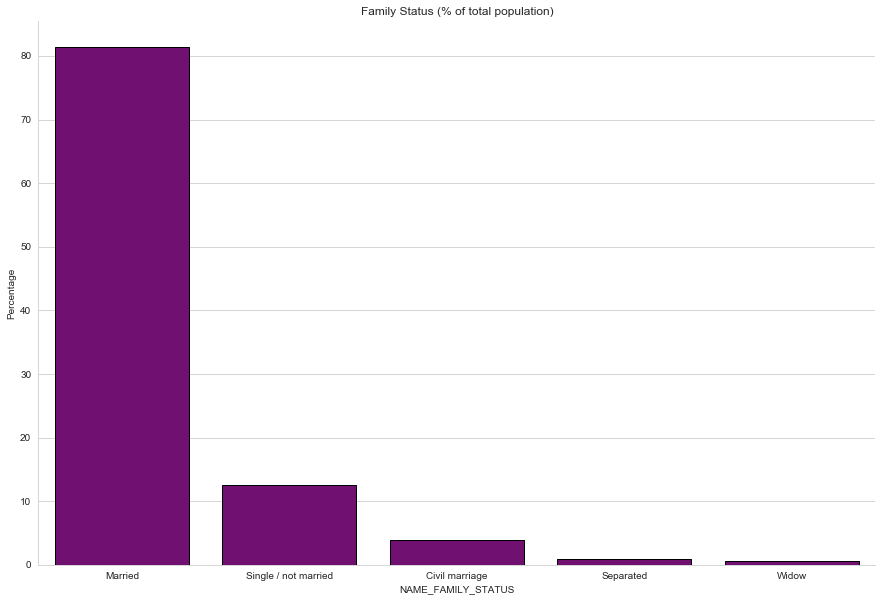

In [74]:
# plot a bar graph of Family status in terms of percentage contribution
sizes = []
labels = []
plt.figure(figsize=(15,10))
for index in enumerate(df['NAME_FAMILY_STATUS'].value_counts()):
    sizes.append(round(100*(df[i[1]].value_counts()[index[0]] / df.shape[0]),2))
    labels.append(df['NAME_FAMILY_STATUS'].value_counts().index[index[0]])

sns.barplot(x=labels,y=sizes, data=df, edgecolor='black', color='purple')
plt.title('Family Status (% of total population)')
plt.ylabel('Percentage')
plt.xlabel('NAME_FAMILY_STATUS')
sns.despine(top=True)

### As assumed above, it can be now inferred that the 'MARRIED' segment in total contribute as majority when it comes to applying for a loan.

### BIVARIATE Analysis - Continuous Columns

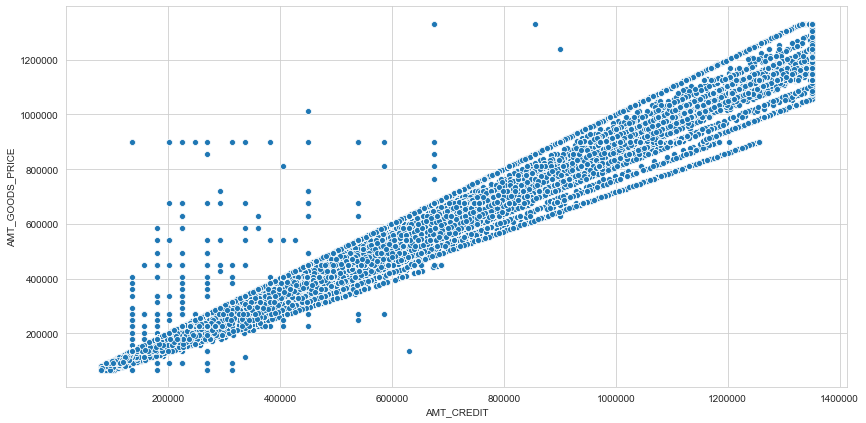

In [75]:
# plot for AMT_INCOME_TOTAL and AMT_GOODS_PRICE
plt.figure(figsize=(14,7))
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE', data=df_conti_tar_0)
plt.show()

### This is the positive correlation between the amount requested by the client for goods and the amount credited by the bank, but there seems to be certain spikes for few applicants where the amount requested was more than the amount credited. This could mean that they wanted to buy certain expensive goods, but instead settled for less expensive goods of the similar category, and hence were able to repay the loan on time.

<Figure size 1440x720 with 0 Axes>

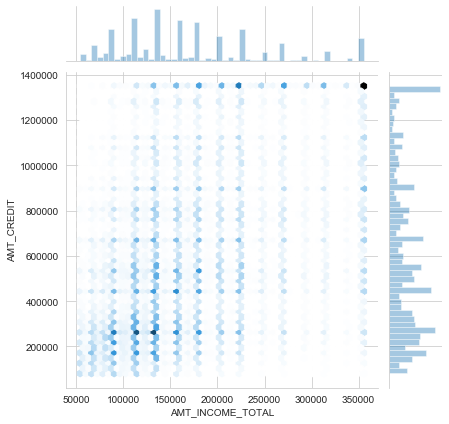

In [76]:
plt.figure(figsize=(20,10))
sns.jointplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT', data=df_conti_tar_0,kind='hex')
plt.show()

### The Annual income of the client and the amount credited by the bank is heavily clustured at 3.5L as income. and the credit value at a highly dense area of 13.8L

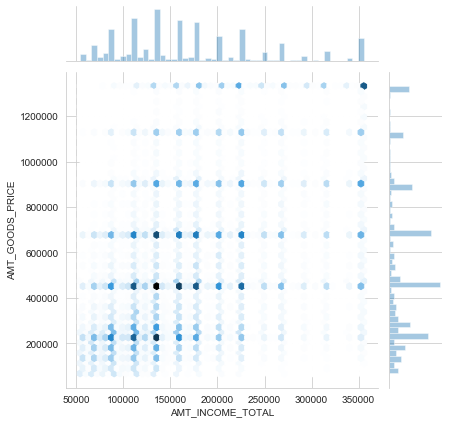

In [77]:
sns.jointplot(x='AMT_INCOME_TOTAL',y='AMT_GOODS_PRICE', data=df_conti_tar_0,kind='hex')
plt.show()

### The Annual income of the client and the amount requested by the client for goods is heavily clustured at 1.4L as income and 4.25L as price of goods.

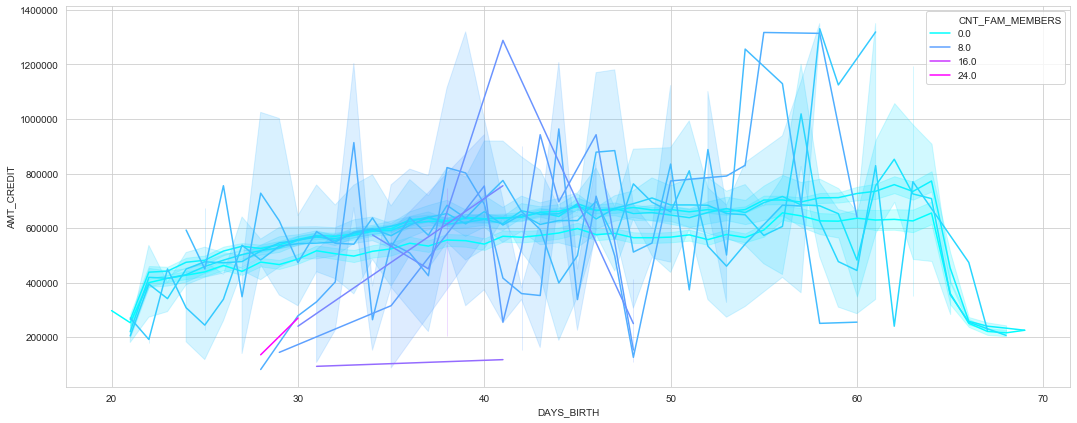

In [78]:
plt.figure(figsize=(18,7))
sns.lineplot(x='DAYS_BIRTH',y='AMT_CREDIT', hue='CNT_FAM_MEMBERS',data=df_conti_tar_0,palette='cool')
plt.show()

### Clients in the late 30's and early 40's with 8 family members took high amount loan amount of around 13L. This can be because of the client are married and living with siblings who are also probably married with 2 children each. The loan could have been paid on time due to more number of people with income.

### Also, for the clients in thier mid 50's and late 50's with 0 family members took the similar amount of loan of rs 13L. 

## Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable 0).

In [79]:
# get continuous/numerical columns for target 1 data frame 
num = ['int64', 'float64']
num_cols_0 = list(df_tar_0.select_dtypes(include=num).columns)

# print the continuous columns
print(num_cols_0)

# create new data frame with only continnuous variables to analyse for TARGET 1
new_df_tar_0 = df_tar_0.select_dtypes(include=num)

# drop irrelavant column, i.e., the loan id
new_df_tar_0.drop('SK_ID_CURR', axis=1, inplace=True)

# check head
new_df_tar_0.head()

['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
1,270000.0,1293502.5,1129500.0,45,3,2.0
2,67500.0,135000.0,135000.0,52,0,1.0
3,135000.0,312682.5,297000.0,52,8,2.0
4,121500.0,513000.0,513000.0,54,8,1.0
5,99000.0,490495.5,454500.0,46,4,2.0


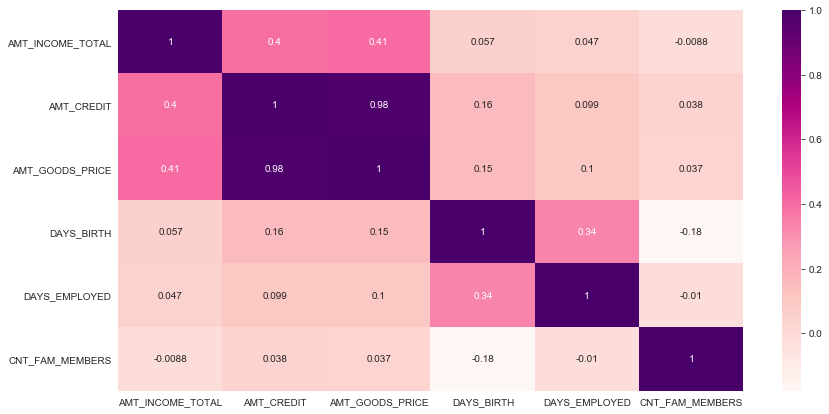

In [80]:
# find correlation
corr_mat = new_df_tar_0.corr()

# plot a heat map to visualize it
plt.figure(figsize=(14,7))
sns.heatmap(corr_mat, annot=True, cmap='RdPu')
plt.show()

In [81]:
# find top 10 correrated continuous variables for TARGET 0
corr = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))
corr = corr.abs().unstack().reset_index()
corr.columns= ['VAR1','VAR2', 'CORR']
corr.dropna(subset=['CORR'], inplace=True)
corr = corr.sort_values(by='CORR', ascending=False)
df_top_10_corr_tar_0 = corr[:10]

# create new column 'CORR_VARS' by joining both the columns of continuous variables
df_top_10_corr_tar_0['CORR_VARS'] = df_top_10_corr_tar_0['VAR1'].str.cat(df_top_10_corr_tar_0['VAR2'],sep=' - ')
df_top_10_corr_tar_0

,VAR1,VAR2,CORR,CORR_VARS
13,AMT_GOODS_PRICE,AMT_CREDIT,0.984233,AMT_GOODS_PRICE - AMT_CREDIT
12,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.405024,AMT_GOODS_PRICE - AMT_INCOME_TOTAL
6,AMT_CREDIT,AMT_INCOME_TOTAL,0.396236,AMT_CREDIT - AMT_INCOME_TOTAL
27,DAYS_EMPLOYED,DAYS_BIRTH,0.338403,DAYS_EMPLOYED - DAYS_BIRTH
33,CNT_FAM_MEMBERS,DAYS_BIRTH,0.178199,CNT_FAM_MEMBERS - DAYS_BIRTH
19,DAYS_BIRTH,AMT_CREDIT,0.159920,DAYS_BIRTH - AMT_CREDIT
20,DAYS_BIRTH,AMT_GOODS_PRICE,0.154087,DAYS_BIRTH - AMT_GOODS_PRICE
26,DAYS_EMPLOYED,AMT_GOODS_PRICE,0.100874,DAYS_EMPLOYED - AMT_GOODS_PRICE
25,DAYS_EMPLOYED,AMT_CREDIT,0.099319,DAYS_EMPLOYED - AMT_CREDIT
18,DAYS_BIRTH,AMT_INCOME_TOTAL,0.057464,DAYS_BIRTH - AMT_INCOME_TOTAL


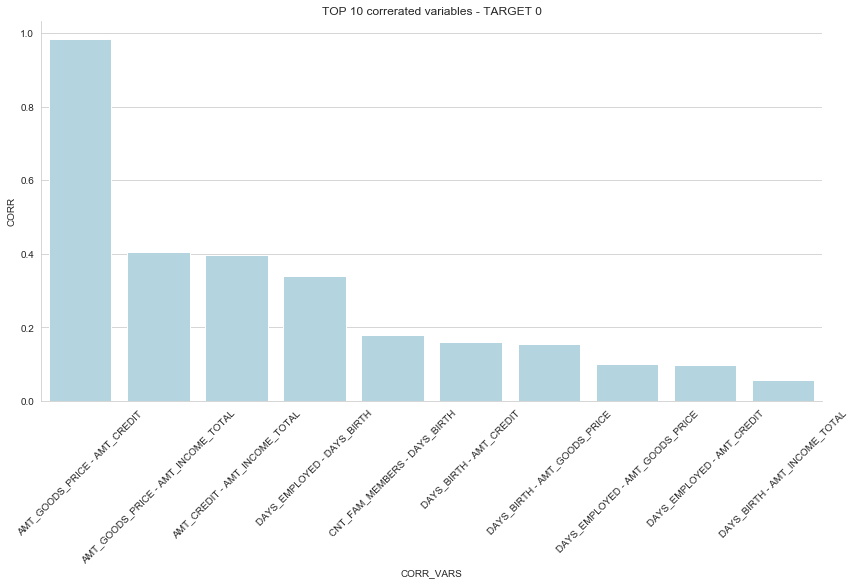

In [82]:
# plot the correlation value with corr variables in descending order
plt.figure(figsize=(14,7))
sns.barplot(x='CORR_VARS', y='CORR', data=df_top_10_corr_tar_0, color='lightblue')
plt.xticks(rotation=45)
plt.title('TOP 10 correrated variables - TARGET 0')
sns.despine(top=True)
plt.show()

###  For TARGET 0 also, AMT_CREDIT and AMT_GOODS_PRICE have the highest correlation of 0.98 or 98%

In [83]:
# add column 'TARGET' to both the data frames that contains correlated values
df_top_10_corr_tar_1['TARGET'] = 1
df_top_10_corr_tar_0['TARGET'] = 0

# Concat both the data frames
df_top_10_tar = pd.concat([df_top_10_corr_tar_1,df_top_10_corr_tar_0])

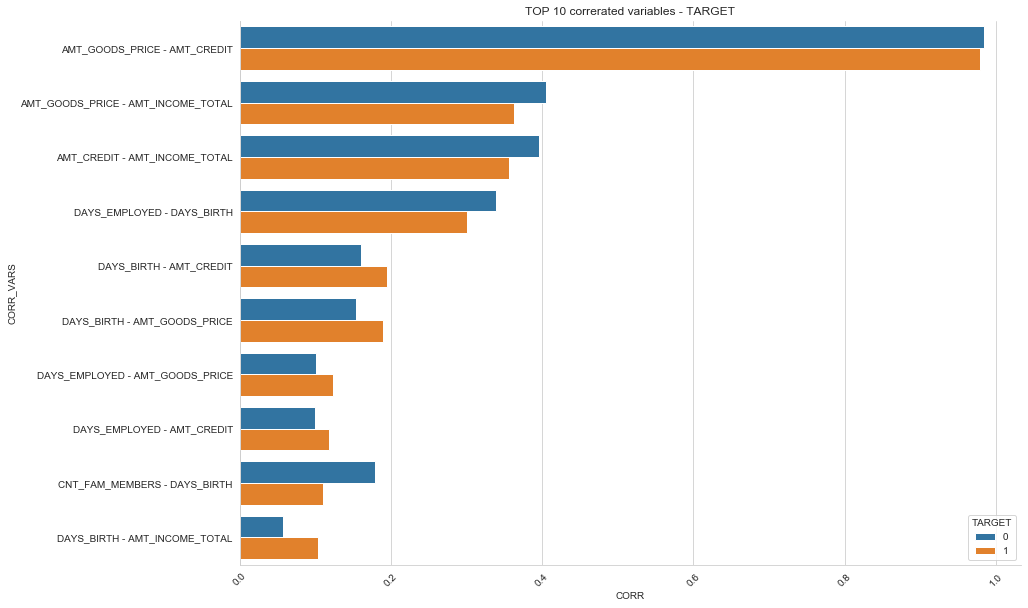

In [84]:
# plot the graph to visualize the difference
plt.figure(figsize=(14,10))
sns.barplot(y='CORR_VARS', x='CORR',hue='TARGET', data=df_top_10_tar)
plt.xticks(rotation=45)
plt.title('TOP 10 correrated variables - TARGET')
sns.despine(top=True)
plt.show()

### The Top-10 correrated variables are portraying almost similar pattern for both the TARGET 1 data frame and TARGET 0 data frame.

## Previous Application Data

In [85]:
# load 'previous_application' data.
prev_app = pd.read_csv(r'C:\Users\akshay.nasarpuri\Documents\Jupyter\Data_EDA_Case_Study\previous_application.csv')

In [86]:
# print columns
print(prev_app.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [87]:
# check info
print(prev_app.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [88]:
# check statistical pointers
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [89]:
# check head
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# check for missing value percentage
missing_values = round(100*(prev_app.isnull().sum()/len(prev_app)),2)
missing_values

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [91]:
# check the columns with NaN's greater than 50%
columns_todrop= dict(missing_values[missing_values >=50.00])
columns_todrop.keys()

dict_keys(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'])

In [92]:
# Drop the above columns
prev_app.drop(columns_todrop.keys(),axis=1,inplace=True)
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


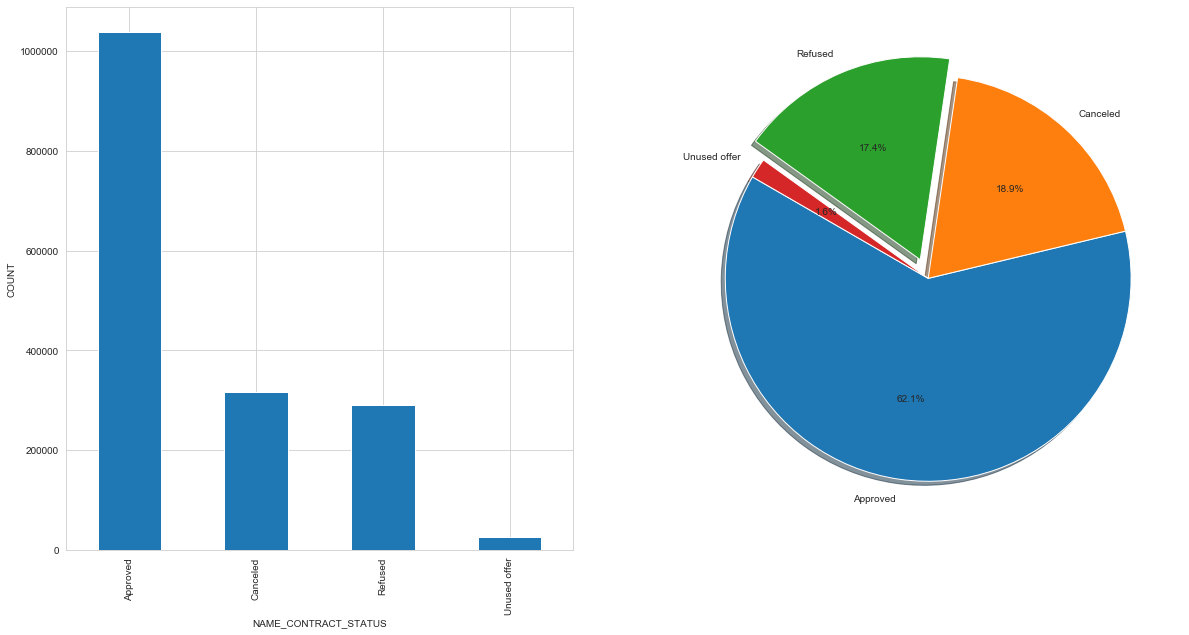

In [93]:
# plot bar graph and pie chart to gauge the percentage distribution of the status of previous loans

# BAR PLOT
plt.figure(figsize=(20,10))
plt.subplot(121)
prev_app['NAME_CONTRACT_STATUS'].value_counts().plot(kind='bar')
plt.xlabel("NAME_CONTRACT_STATUS")
plt.ylabel("COUNT")

# PIE CHART
sizes = []
labels = []
for i in enumerate(prev_app['NAME_CONTRACT_STATUS'].value_counts()):
    labels.append(prev_app['NAME_CONTRACT_STATUS'].value_counts().index[i[0]])
    sizes.append(i[1])
    
explode = (0,0,0.1,0)
plt.subplot(122)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=150)    
plt.show()

## Inferences from NAME_CONTRACT_STATUS graphs

From the above graph we can see Approved count is much higher, and the percentage of __Approved__ applications is __62.1%__.

A very minimal percentage of __Refused / Rejected__ applications are also noticed at __17.4%__.

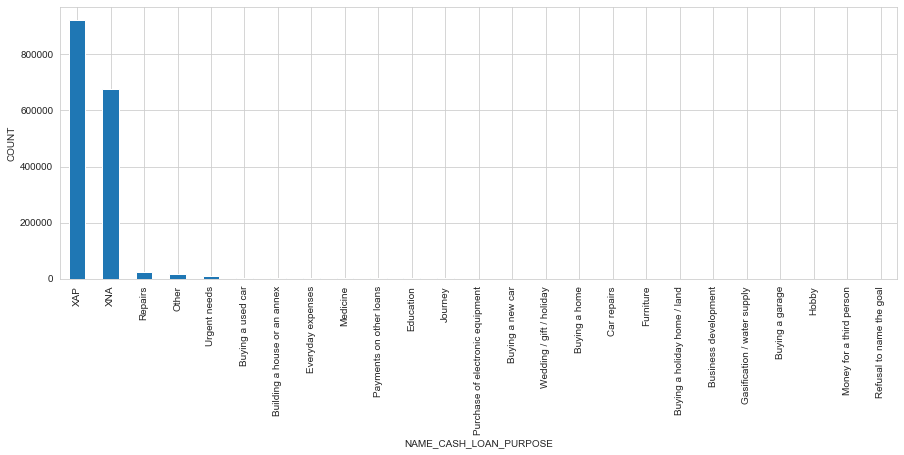

In [94]:
prev_app['NAME_CASH_LOAN_PURPOSE'].value_counts().plot(kind='bar',figsize=(15,5))
plt.xlabel("NAME_CASH_LOAN_PURPOSE")
plt.ylabel("COUNT")
plt.show()

## Inferences from NAME_CASH_LOAN_PURPOSE graph

From the above graph XAP count is higher than rest.

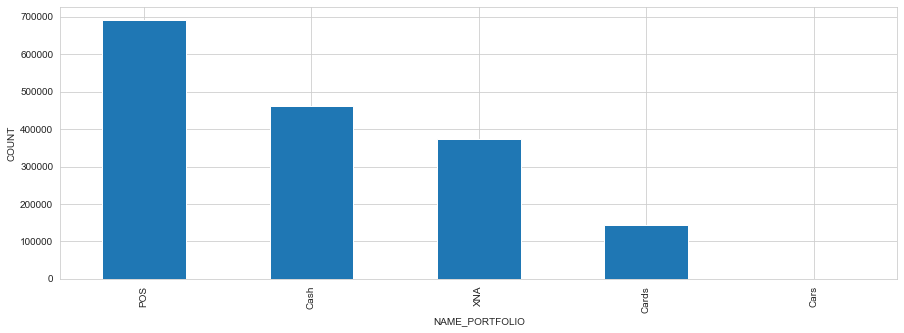

In [95]:
prev_app['NAME_PORTFOLIO'].value_counts().plot(kind='bar',figsize=(15,5))
plt.xlabel("NAME_PORTFOLIO")
plt.ylabel("COUNT")
plt.show()

## Inferences from NAME_PORTFOLIO graph

From the above graph we can see that POS count is much higher

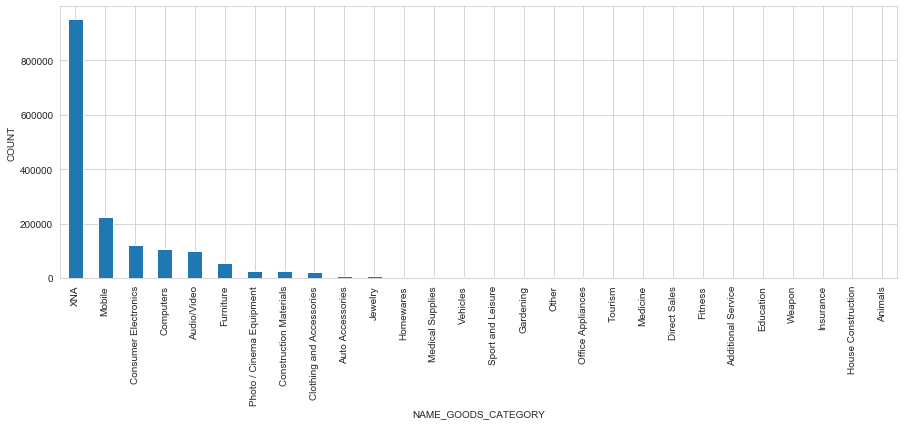

In [96]:
prev_app['NAME_GOODS_CATEGORY'].value_counts().plot(kind='bar',figsize=(15,5))
plt.xlabel("NAME_GOODS_CATEGORY")
plt.ylabel("COUNT")
plt.show()

## Inferences from NAME_GOODS_CATEGORY graph

From the above graph we can see XNA count is much higher than rest

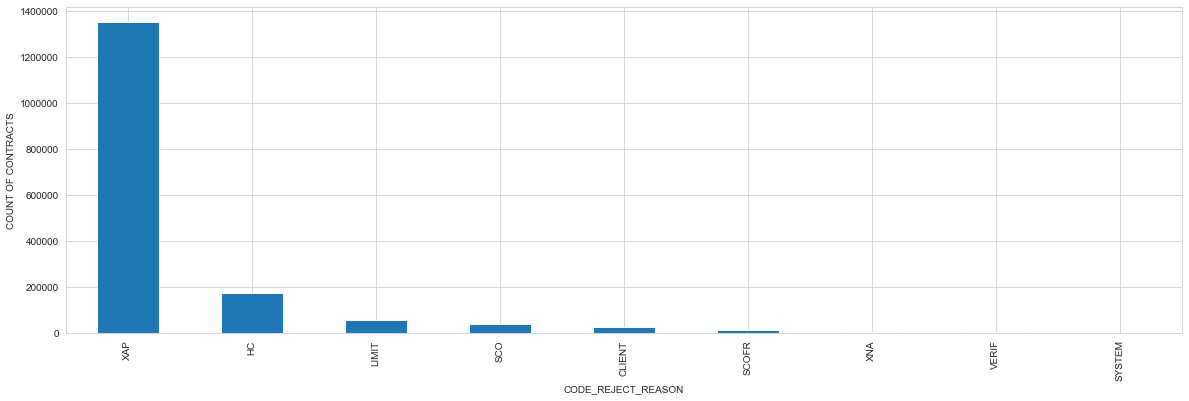

In [97]:
prev_app['CODE_REJECT_REASON'].value_counts().plot(kind='bar',figsize=(20,6))
plt.xlabel("CODE_REJECT_REASON")
plt.ylabel("COUNT OF CONTRACTS")
plt.show()

## Inferences from CODE_REJECT_REASON graph

From the above graph we can see XAP count is high

In [98]:
def plot_n(column):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    s=sns.boxplot(y=prev_app[column]);
    plt.title('Box Plot '+ '%s' %column, fontsize=8)
    plt.xlabel('%s' %column)
    plt.ylabel("Loan count")
    plt.subplot(1, 2, 2)
    s=plt.hist(x=prev_app[column]);
    plt.xlabel('%s' %column)
    plt.ylabel("Loan count")
    plt.title('Histogram '+ '%s' %column, fontsize=8)
plt.show()

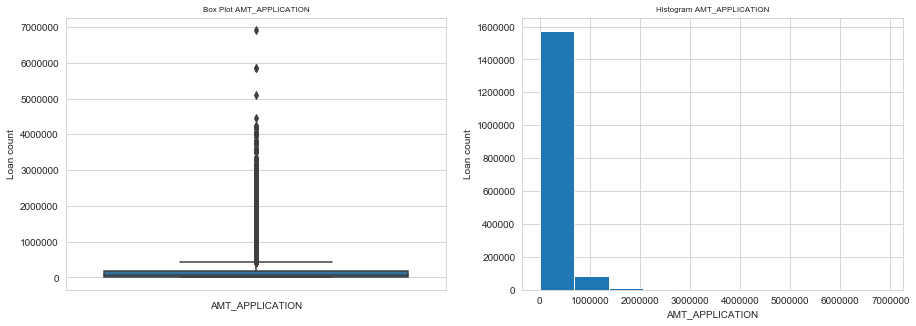

In [99]:
plot_n('AMT_APPLICATION')

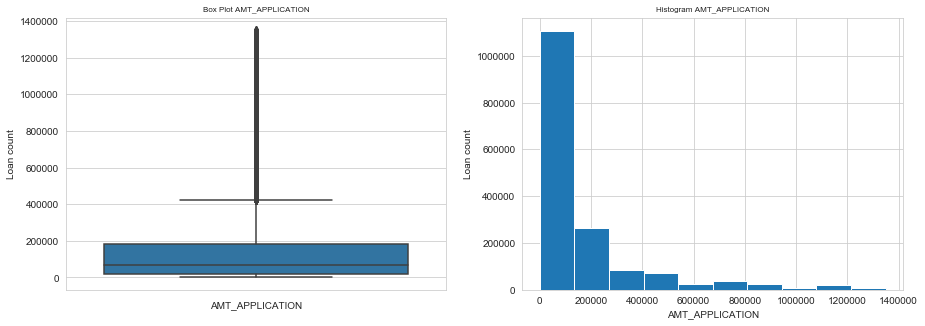

In [100]:
prev_app=prev_app[prev_app['AMT_APPLICATION']<np.nanpercentile(prev_app['AMT_APPLICATION'], 99)]
plot_n('AMT_APPLICATION')

## For how much credit did client ask on the previous application ?

After treating for OUTLIERS, Huge number of applications (around 11 Lakhs) were submitted for the requested amount less that 2 Lakh rs. 

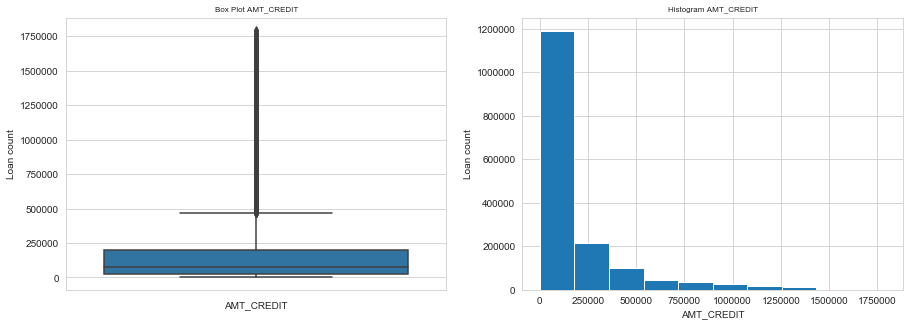

In [101]:
plot_n('AMT_CREDIT')

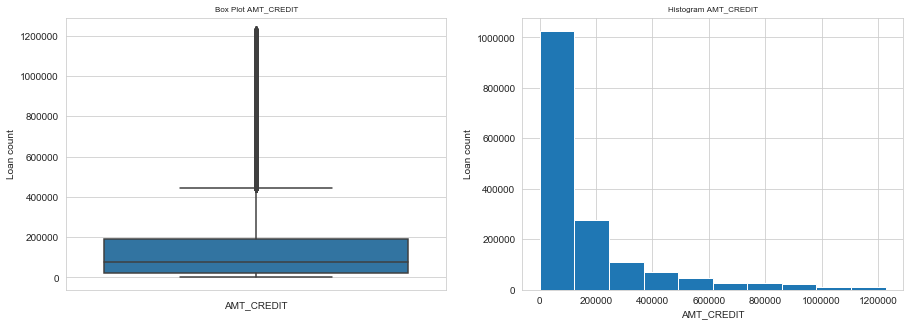

In [102]:
prev_app=prev_app[prev_app['AMT_CREDIT']<np.nanpercentile(prev_app['AMT_CREDIT'], 99)]
plot_n('AMT_CREDIT')

## How much credit did the bank give to the client for previous application?
Applications between 10L and 11L were given the requested amount.

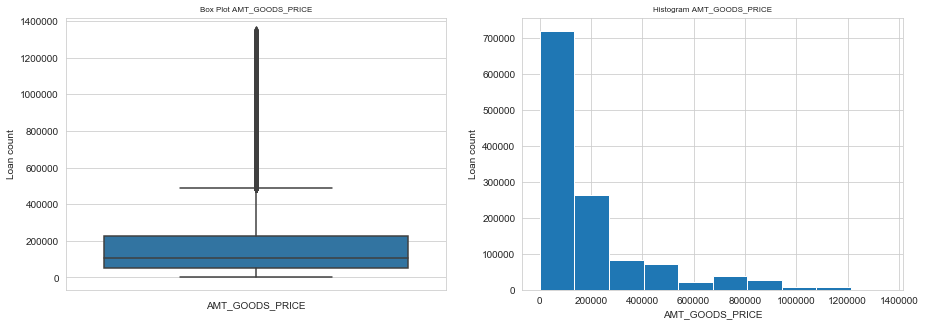

In [103]:
plot_n('AMT_GOODS_PRICE')

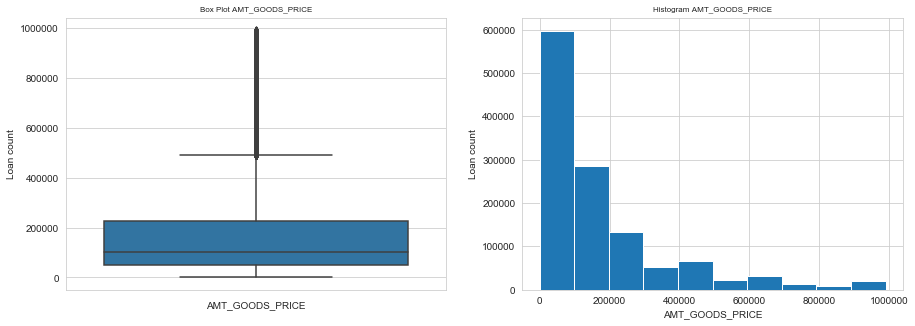

In [104]:
prev_app=prev_app[prev_app['AMT_GOODS_PRICE']<np.nanpercentile(prev_app['AMT_GOODS_PRICE'], 99)]
plot_n('AMT_GOODS_PRICE')

## Goods price for which the client asked for on the previous application. 

Majority of the clients asked for amount < 1L

## Bivariate Analysis

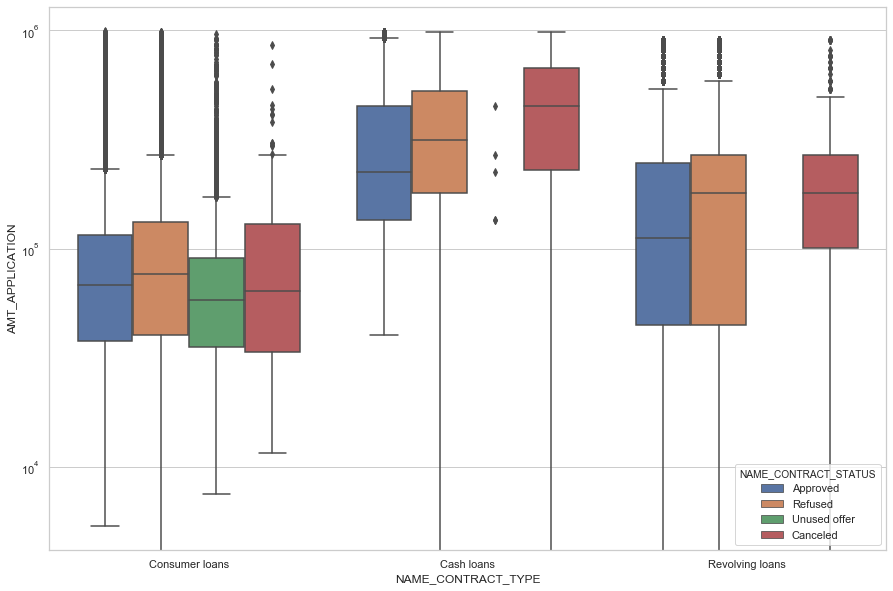

In [105]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x = 'NAME_CONTRACT_TYPE' , y = 'AMT_APPLICATION',hue = 'NAME_CONTRACT_STATUS', data = prev_app)
ax.set_yscale('log')

## Which type of loans were majorly taken and what was their status?

1. __Cash Loans__ were the highest with their median greater than the 75th percentile of other types of loans, such as 'Consumer', 'Revolving', etc. 


2. __Approved__ & __Refused__ loans for the __Cash Loans__ have similar distribution, with the amount requested by client lying around 25th percetile were more.

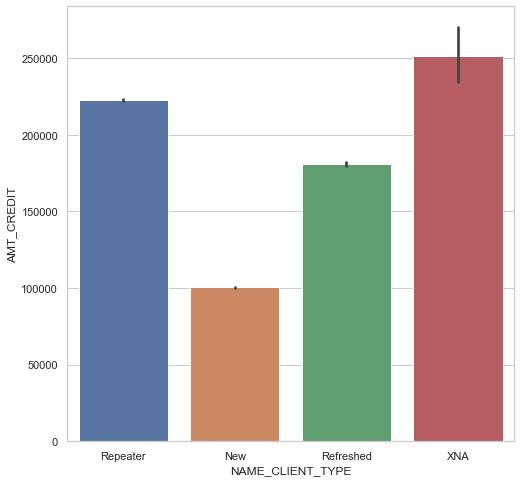

In [106]:
plt.figure(figsize=(8, 8))
sns.barplot(x = 'NAME_CLIENT_TYPE' , y = 'AMT_CREDIT',data = prev_app)

## If missing values are ignored, then the Clients who were 'Repeater' were given high amount of loan credits.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

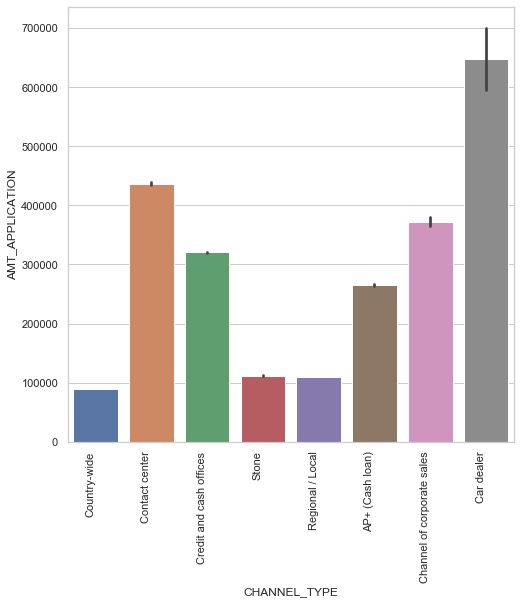

In [107]:
plt.figure(figsize=(8, 8))
sns.barplot(x = 'CHANNEL_TYPE' , y = 'AMT_APPLICATION',data = prev_app)
plt.xticks(horizontalalignment='right',rotation=90)

## Through which channel the bank acquired the client on the previous application?

__'Car dealer'__ channel was used to acquire the clients.

# Inferences

In [108]:
prev_app_corr=prev_app.corr()
round(prev_app_corr,2)

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,1.00,-0.0,0.01,0.01,0.01,0.01,-0.00,-0.00,0.01,-0.00,0.01,-0.00,-0.00,-0.00,0.00,0.00,0.00
SK_ID_CURR,-0.00,1.0,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00
AMT_ANNUITY,0.01,0.0,1.00,0.80,0.79,0.80,-0.04,0.01,0.25,-0.01,0.30,0.04,-0.07,-0.08,0.06,0.05,0.29
AMT_APPLICATION,0.01,0.0,0.80,1.00,0.99,1.00,-0.06,-0.03,0.31,-0.01,0.62,-0.06,-0.00,0.06,0.22,0.22,0.26
AMT_CREDIT,0.01,0.0,0.79,0.99,1.00,0.99,-0.07,-0.03,0.32,-0.02,0.66,-0.05,-0.01,0.04,0.23,0.22,0.30
AMT_GOODS_PRICE,0.01,0.0,0.80,1.00,0.99,1.00,-0.06,-0.04,0.31,-0.01,0.62,-0.06,-0.00,0.06,0.22,0.22,0.26
HOUR_APPR_PROCESS_START,-0.00,0.0,-0.04,-0.06,-0.07,-0.06,1.00,0.00,-0.01,0.02,-0.06,0.01,0.00,-0.01,-0.02,-0.02,-0.12
NFLAG_LAST_APPL_IN_DAY,-0.00,-0.0,0.01,-0.03,-0.03,-0.04,0.00,1.00,-0.04,0.00,0.04,-0.00,0.00,0.00,0.00,0.00,-0.01
DAYS_DECISION,0.01,-0.0,0.25,0.31,0.32,0.31,-0.01,-0.04,1.00,-0.01,0.19,-0.16,0.21,0.23,0.48,0.48,-0.06
SELLERPLACE_AREA,-0.00,0.0,-0.01,-0.01,-0.02,-0.01,0.02,0.00,-0.01,1.00,-0.01,0.01,-0.00,-0.00,-0.00,-0.00,-0.02


<Figure size 1080x864 with 0 Axes>

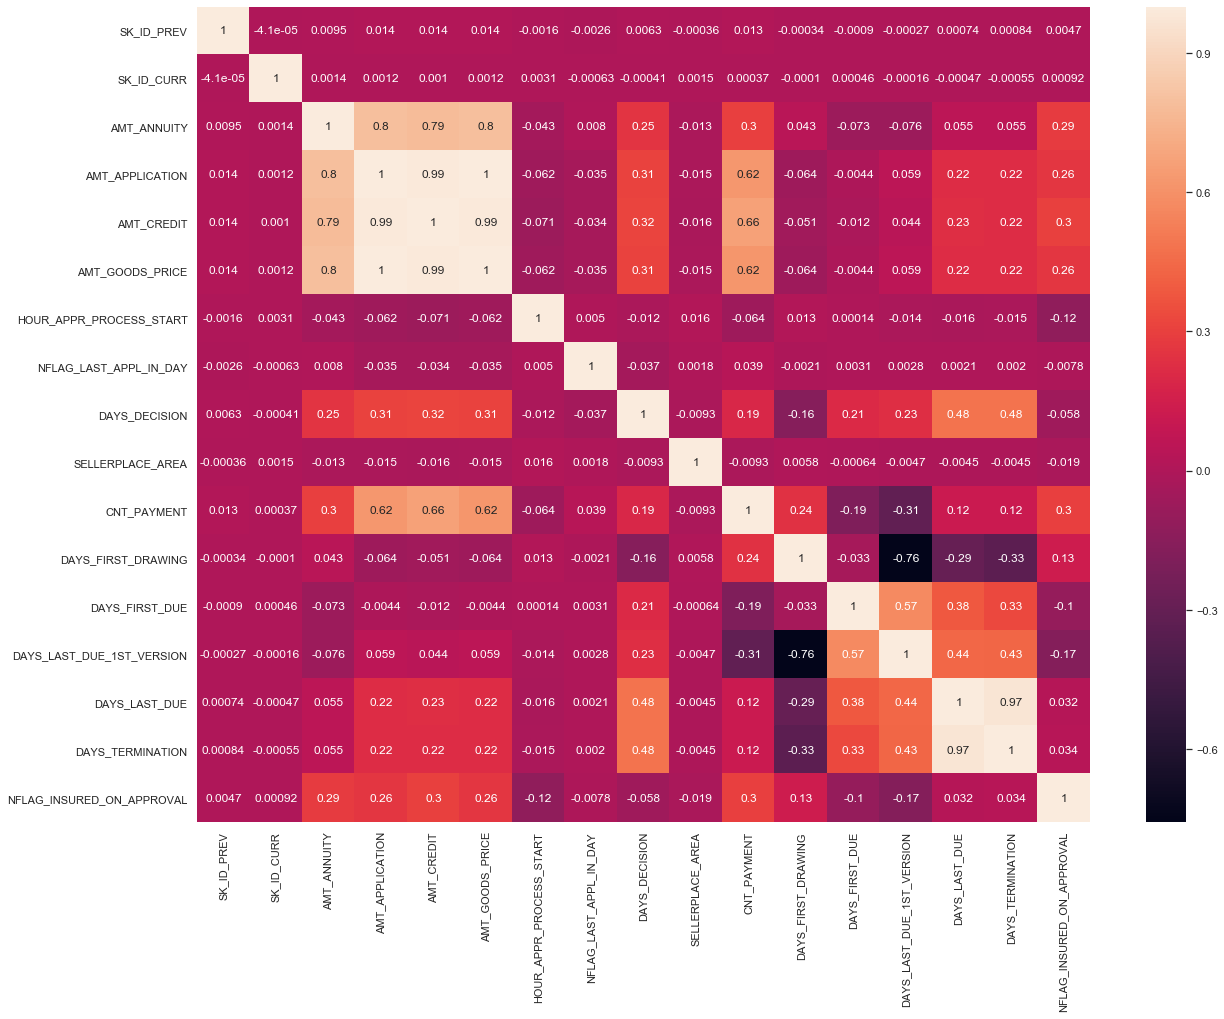

In [109]:
plt.figure(figsize=(15,12))
plt.figure(figsize=(20,15))
sns.heatmap(prev_app_corr, annot=True)
plt.show()

### The amount that was credited to clients have high correlation with the amount that the client repayed annually, which indicates that the loan was repayed, but since the correlation is 0.79, chances of late payment could have occurred for few applicants.

## Current and Previous application analysis

In [110]:
# merge current and previous data (application_data and previous_application) files
curr_prev_df = pd.merge(df,prev_app,on='SK_ID_CURR',how='inner')

# Check the shape of Data frame after dropping the columns
print(curr_prev_df.shape)

(848602, 54)


In [111]:
# check info of merged data frame
curr_prev_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848602 entries, 0 to 848601
Data columns (total 54 columns):
SK_ID_CURR                      848602 non-null int64
TARGET                          848602 non-null object
NAME_CONTRACT_TYPE_x            848602 non-null object
CODE_GENDER                     848602 non-null object
FLAG_OWN_CAR                    848602 non-null object
CNT_CHILDREN                    848602 non-null object
AMT_INCOME_TOTAL                848602 non-null float64
AMT_CREDIT_x                    848602 non-null float64
AMT_GOODS_PRICE_x               848602 non-null float64
NAME_TYPE_SUITE_x               847291 non-null object
NAME_INCOME_TYPE                848602 non-null object
NAME_EDUCATION_TYPE             848602 non-null object
NAME_FAMILY_STATUS              848602 non-null object
NAME_HOUSING_TYPE               848602 non-null object
DAYS_BIRTH                      848602 non-null int64
DAYS_EMPLOYED                   848602 non-null int64
OCCUPATIO

In [112]:
# check head of merged data frame
curr_prev_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,ORGANIZATION_TYPE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,0,202500.0,406597.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25,1,Laborers,1.0,2,WEDNESDAY,Morning,Business Entity Type 3,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45,3,Core staff,2.0,1,MONDAY,Morning,School,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,0,270000.0,1293502.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45,3,Core staff,2.0,1,MONDAY,Morning,School,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,0,270000.0,1293502.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45,3,Core staff,2.0,1,MONDAY,Morning,School,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52,0,Laborers,1.0,2,MONDAY,Morning,Government,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [113]:
# calculate percentage of distinct values of 'TARGET' column
round(100*(curr_prev_df['TARGET'].value_counts() / curr_prev_df.shape[0]),2)

0    90.96
1     9.04
Name: TARGET, dtype: float64

### After merging the current file to the previous loan application file, there is still huge data imbalance w.r.t to the 'TARGET' variable. The ratio of 0 to 1 is 90.96% : 9.04%

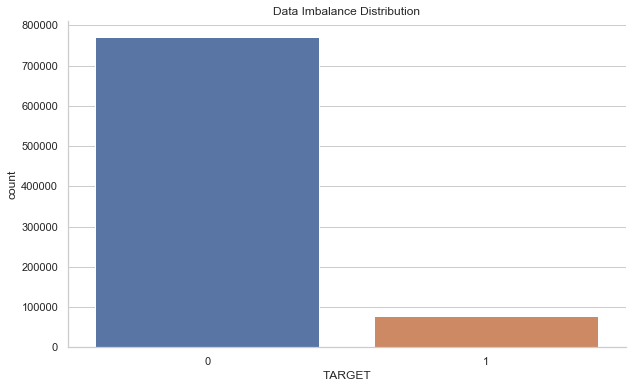

In [114]:
# plot the TARGET column to visualize the imbalance
plt.figure(figsize=(10,6))
plt.title('Data Imbalance Distribution')
sns.countplot(x='TARGET', data=curr_prev_df)
sns.despine(top=True)

### From the application_data file, we came to know that the MARRIED segment had the highest number of defaults. Let's check if the previous loans applied by this category show some pattern or not.

In [115]:
# get the married people who defaulted
married_defaulters_df = curr_prev_df.loc[(curr_prev_df['NAME_FAMILY_STATUS'] == 'Married') & (curr_prev_df['TARGET'] == 1)]

# check shape
print(married_defaulters_df.shape)

(47678, 54)


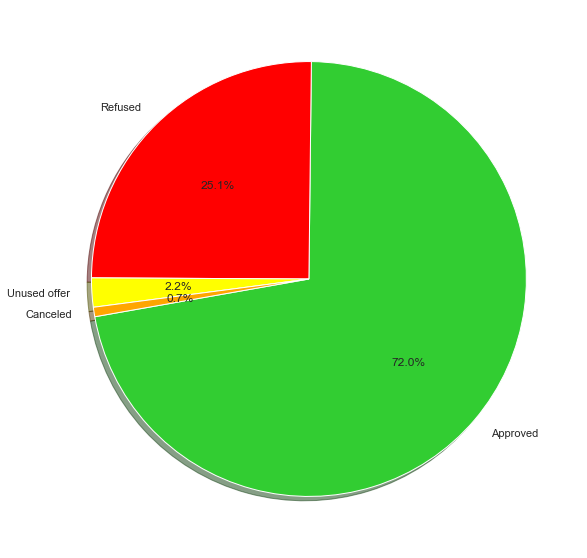

In [116]:
# plot pie chart to gauge the percentage distribution of the status of previous loans
plt.figure(figsize=(14,10))
sizes = []
labels = []
for i in enumerate(married_defaulters_df['NAME_CONTRACT_STATUS'].value_counts()):
    labels.append(married_defaulters_df['NAME_CONTRACT_STATUS'].value_counts().index[i[0]])
    sizes.append(i[1])
    
explode = (0,0,0,0)    
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=190,colors=['limegreen','red','yellow','orange'])    
plt.show()

### Majority of the previous applications of MARRIED clients who defaulted had their loans approved, which was 72%. Now, this is a little strange, since these defaulters has their previous loans approved with high percentage. Let's check some correlation to find out more.

In [117]:
# get continuous/numerical columns for target 1 data frame 
num = ['int64', 'float64']
num_cols_0 = list(married_defaulters_df.select_dtypes(include=num).columns)

# print the continuous columns
print(num_cols_0)

# create new data frame with only continnuous variables to analyse for TARGET 1
new_married_defaulters_df = married_defaulters_df.select_dtypes(include=num)

# drop irrelavant column, i.e., the loan id
new_married_defaulters_df.drop('SK_ID_CURR', axis=1, inplace=True)
new_married_defaulters_df.drop('SK_ID_PREV', axis=1, inplace=True)

# check head
new_married_defaulters_df.head()

['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_GOODS_PRICE_x', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'SK_ID_PREV', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'HOUR_APPR_PROCESS_START_y', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_GOODS_PRICE_x,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
116,202500.0,1193580.0,855000.0,47,3,2.0,11117.700,157500.0,157500.0,157500.0,15,1,-1467,-1,24.0,365243.0,-1437.0,-747.0,-1167.0,-1163.0,1.0
117,202500.0,1193580.0,855000.0,47,3,2.0,31674.870,675000.0,744498.0,675000.0,11,1,-1075,-1,36.0,NaN,NaN,NaN,NaN,NaN,NaN
118,202500.0,1193580.0,855000.0,47,3,2.0,4586.895,38205.0,34384.5,38205.0,12,1,-2634,27,10.0,365243.0,-2601.0,-2331.0,-2331.0,-2326.0,0.0
119,202500.0,1193580.0,855000.0,47,3,2.0,19197.000,450000.0,450000.0,450000.0,11,1,-1072,-1,36.0,NaN,NaN,NaN,NaN,NaN,NaN
120,202500.0,1193580.0,855000.0,47,3,2.0,11423.025,135000.0,196528.5,135000.0,14,1,-1172,-1,36.0,NaN,NaN,NaN,NaN,NaN,NaN


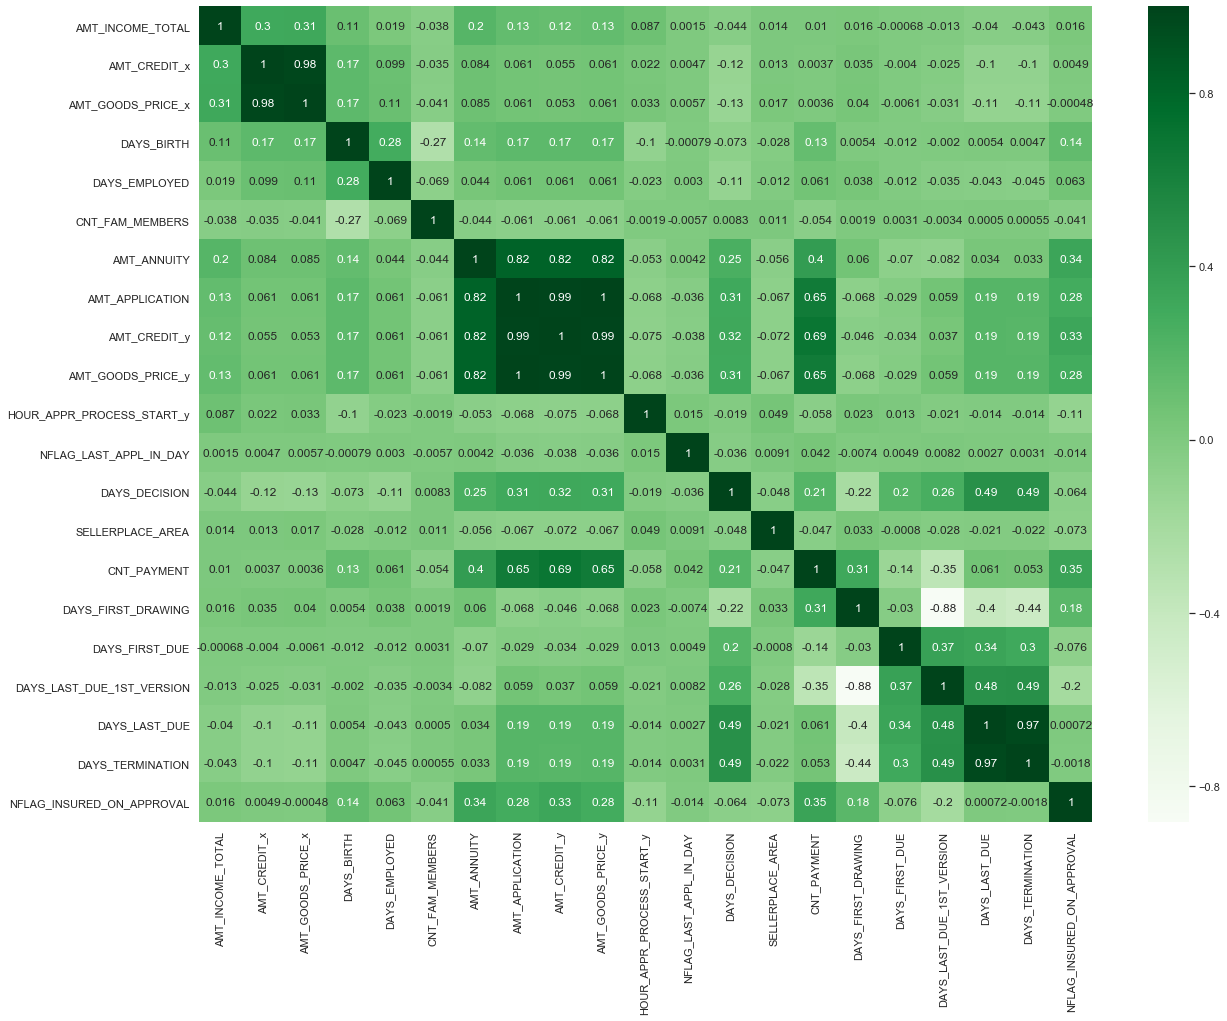

In [118]:
plt.figure(figsize=(20,15))
sns.heatmap(new_married_defaulters_df.corr(),cmap='Greens',annot=True)
plt.show()

### The correlation between the 'AMT_ANNUITY' and 'AMT_CREDIT_y' is 82%, which is high.

## Previous application have very less impact on the defaulters of the current loan when considered for the 'MARRIED' segment.